# Table of Contents

* [Library Import](#library)
* [Data Import](#data_import)
* [Check data integrity](#data_check)
    * [No-template controls (NTC's)](#ntc)
    * [Failed samples](#fail)  
    * [Outlier identification with reference genes](#outliers)
    * [Check reference genes](#ref_genes)
    * [Target genes](#target_genes)
        * [Calculate ΔCq & 2^-ΔCq](#delta_Cq)
        * [Plot genes](#target_plots)

# Library import<a class="anchor" id="library"></a>

In [1]:
# pip install scikit_posthocs
# pip install researchpy

In [2]:
# Import libraries
import pandas as pd
from pathlib import Path
import numpy as np
import re
import os

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Import plot libraries
import matplotlib as mpl
import matplotlib.pyplot as pp
import seaborn as sb

# Set custom design for plots
%matplotlib inline
IPython_default = pp.rcParams.copy()
# from matplotlib import rc, cycler
# colors = cycler('color',
#                 ['#4776a6', # dark blue
#                  '#47a6a6', # dark light blue
#                  '#a11717', # dark red
#                  '#a64747', # dark light red
#                  ['#2183e6', # blue 
#                  '#21e6e6', # light blue 
#                  '#e62121', # red 
#                  '#e68421']) # orange
                    


mpl.rcParams['font.family'] = 'Arial'
params = {'figure.figsize': (14, 12),
         'axes.labelsize': 20,
         'axes.titlesize': 36,
         'xtick.labelsize':20,
         'ytick.labelsize':18,
         'legend.fontsize': 20,
         'legend.title_fontsize': 'xx-large',
         'axes.facecolor': '#FFFFFF',
         'axes.axisbelow': 'True',
         'axes.grid': 'False',
#          'axes.prop_cycle': colors,
         'lines.linewidth': 2,
         'axes.xmargin' : 0.01}
mpl.rcParams.update(params)
pp.style.use('ggplot')


# Statistics
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import statsmodels.stats.multicomp as mc
from scipy.stats.mstats import gmean

In [3]:
# colors = cycler('color',
#                 ['#6d9636', # dark green
#                  '#022869', # dark blue
#                  '#6950cd', # dark purple
#                  '#941111', # dark red
#                  '#88BB44', # green    
#                  '#66EEEE', # bright blue    
#                  '#9988DD', # purple   
#                  '#EE6666']) # bright red

# Reading in the data <a class="anchor" id="data_import"></a>

Each plate imported as individual csv file.

**Notes:**
- Imported as CSV files in Norwegian, so delimiter is ";" and decimal is "," whereas some files were edited on a US computer, so decimal is still "," but the delimiter is no longer ";".
- Group 1 contains accessions (N2 and I1), run in 2020
- Group 2 contains clonse (N13 and I4), run in 2021

- Plates 48, 49, 50 (PRR5 for group 2) failed, re-done in 2022 as plates 64, 65, 66

In [12]:
pwd

'/Users/corinefaehn/Downloads/Circadian_gene_results_figures'

In [13]:
# data_Path = "C:\\Users\\cfa024\\OneDrive - UiT Office 365\\Master's Thesis\\Expression Analysis-Python"
# os.chdir(data_Path)

### Biological Replicate 1 <a class="anchor" id="Biological_Replicate_1"></a>

In [19]:
# Group 1
LHY_1 = pd.read_csv(Path("plate1_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_1 = pd.read_csv(Path("plate2_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_1 = pd.read_csv(Path("plate4_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_1 = pd.read_csv(Path("plate5_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_1 = pd.read_csv(Path("plate6_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_1 = pd.read_csv(Path("plate19_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
PRR7_1 = pd.read_csv(Path("plate21_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
PRR5_1 = pd.read_csv(Path("plate24_Cq_Results.csv"), decimal = ",", index_col=1)
RVE8_1 = pd.read_csv(Path("plate27_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_1 = pd.read_csv(Path("plate30_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

# Group 2
LHY_4 = pd.read_csv(Path("plate33_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_4 = pd.read_csv(Path("plate60_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_4 = pd.read_csv(Path("plate39_Cq_Results.csv"), decimal=",", index_col=1)
PRDX_4 = pd.read_csv(Path("plate57_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_4 = pd.read_csv(Path("plate45_Cq_Results.csv"), decimal=",",index_col=1) 
LUX_4 = pd.read_csv(Path("plate54_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_4 = pd.read_csv(Path("plate42_Cq_Results.csv"), decimal=",",index_col=1)
PRR5_4 = pd.read_csv(Path("plate64_Cq_Results.csv"), delimiter=";",index_col=1)
RVE8_4 = pd.read_csv(Path("plate36_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_4 = pd.read_csv(Path("plate51_Cq_Results.csv"), decimal=",",index_col=1)

### Biological Replicate 2 <a class="anchor" id="Biological_Replicate_2"></a>

In [20]:
# Group 1
LHY_2 = pd.read_csv(Path("plate7_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_2 = pd.read_csv(Path("plate8_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_2 = pd.read_csv(Path("plate10_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_2 = pd.read_csv(Path("plate11_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_2 = pd.read_csv(Path("plate12_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
LUX_2 = pd.read_csv(Path("plate20_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR7_2 = pd.read_csv(Path("plate22_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR5_2 = pd.read_csv(Path("plate25_Cq_Results.csv"), decimal = ",", index_col=1)
RVE8_2 = pd.read_csv(Path("plate28_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
TOC1_2 = pd.read_csv(Path("plate31_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)

# Group 2
LHY_5 = pd.read_csv(Path("plate34_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_5 = pd.read_csv(Path("plate61_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_5 = pd.read_csv(Path("plate40_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_5 = pd.read_csv(Path("plate58_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_5 = pd.read_csv(Path("plate46_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_5 = pd.read_csv(Path("plate55_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_5 = pd.read_csv(Path("plate43_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
PRR5_5 = pd.read_csv(Path("plate65_Cq_Results.csv"), delimiter=";",index_col=1)
RVE8_5 = pd.read_csv(Path("plate37_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)
TOC1_5 = pd.read_csv(Path("plate52_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

### Biological Replicate 3 <a class="anchor" id="Biological_Replicate_3"></a>

In [21]:
# Group 1
LHY_3 = pd.read_csv(Path("plate13_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_3 = pd.read_csv(Path("plate14_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
LUX_3 = pd.read_csv(Path("plate15_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR9_3 = pd.read_csv(Path("plate16_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRDX_3 = pd.read_csv(Path("plate17_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_3 = pd.read_csv(Path("plate18_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR7_3 = pd.read_csv(Path("plate23_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
PRR5_3 = pd.read_csv(Path("plate26_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
RVE8_3 = pd.read_csv(Path("plate29_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
TOC1_3 = pd.read_csv(Path("plate32_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)

# Group 2
LHY_6 = pd.read_csv(Path("plate35_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
GAPDH_6 = pd.read_csv(Path("plate62_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_6 = pd.read_csv(Path("plate41_Cq_Results.csv"), decimal=",", index_col=1)
PRR9_extra_6 = pd.read_csv(Path("plate50_Cq_Results.csv"), decimal=",", index_col=1)
PRDX_6 = pd.read_csv(Path("plate59_Cq_Results.csv"), delimiter=";", decimal=",", index_col=1)
MSI1_6 = pd.read_csv(Path("plate47_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1) 
LUX_6 = pd.read_csv(Path("plate56_Cq_Results.csv"), decimal=",",index_col=1)
PRR7_6 = pd.read_csv(Path("plate44_Cq_Results.csv"), decimal=",",index_col=1)
PRR5_6 = pd.read_csv(Path("plate66_Cq_Results.csv"),delimiter=";",index_col=1)
RVE8_6 = pd.read_csv(Path("plate38_Cq_Results.csv"), decimal=",",index_col=1)
TOC1_6 = pd.read_csv(Path("plate53_Cq_Results.csv"), delimiter=";", decimal=",",index_col=1)

In [22]:
# Results_Path = "C:\\Users\\cfa024\\OneDrive - UiT Office 365\\Master's Thesis\\Writing\\Manuscript\\Manuscript results\\Updated figures"
# os.chdir(Results_Path)

In [23]:
Results_Path = '/Users/corinefaehn/Downloads/Circadian_gene_results_figures'
os.chdir(Results_Path)

In [24]:
pwd

'/Users/corinefaehn/Downloads/Circadian_gene_results_figures'

### Data merge

In [25]:
genes_br_1 = [LHY_1, GAPDH_1, PRR9_1, PRDX_1, MSI1_1, LUX_1, PRR7_1, PRR5_1, RVE8_1, TOC1_1, LHY_4, RVE8_4, PRR9_4, PRR7_4, PRR5_4, MSI1_4, TOC1_4, LUX_4, GAPDH_4, PRDX_4]

genes_br_2 = [LHY_2, GAPDH_2, PRR9_2, PRDX_2, MSI1_2, LUX_2, PRR7_2, PRR5_2, RVE8_2, TOC1_2, LHY_5, RVE8_5, PRR9_5, PRR7_5, PRR5_5, MSI1_5, TOC1_5, LUX_5, PRDX_5, GAPDH_5]

genes_br_3 = [LHY_3, GAPDH_3, LUX_3, PRR9_3, PRDX_3, MSI1_3, PRR7_3, PRR5_3, RVE8_3, TOC1_3, LHY_6, RVE8_6, PRR9_6, PRR7_6, PRR5_6, MSI1_6, TOC1_6, LUX_6, PRDX_6, GAPDH_6, PRR9_extra_6]

In [26]:
br_1 = pd.concat(genes_br_1)
br_2 = pd.concat(genes_br_2)
br_3 = pd.concat(genes_br_3)

#### Dataframe cleanup

* Drop all unneccessary columns
* Replace Sample "NaN" with "NTC"
* Replace Cq "NaN" with 0
* Replace "GADPH" with "GAPDH" (typo)
* Change Target "IRC" from "GAPDH" to "IRC" for IRC samples

In [27]:
br_1.reset_index(inplace = True)
br_1.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# replace sample NaN name's with NTC
br_1["Sample"] = br_1["Sample"].replace(np.nan, "NTC") 
br_1["Sample"] = br_1["Sample"].replace("BLANK", "NTC") 

# replace Cq NaN values with 0
br_1["Cq"] = br_1["Cq"].replace(np.nan, 0) 

 # rename misnamed target's
br_1["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)

# set replicate number for future merged dataframe
br_1['Replicate'] = '1' 

# Set order of columns
br_1 = br_1[['Sample', 'Replicate', 'Target', 'Cq']]

#rename IRC targets for separate use
br_1.loc[br_1["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_1.loc[br_1["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_1.loc[br_1["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"


In [28]:
br_1.loc[br_1['Sample'] == 'I4_3B'] 

,Sample,Replicate,Target,Cq
854,I4_3B,1,LHY,28.967996
935,I4_3B,1,RVE8,28.439062
1015,I4_3B,1,PRR9,25.922230
1095,I4_3B,1,PRR7,26.273794
1175,I4_3B,1,PRR5,24.710000
1252,I4_3B,1,MSI1,29.318290
1284,I4_3B,1,MSI1,0.000000
1331,I4_3B,1,TOC1,28.393389
1410,I4_3B,1,LUX,29.706691
1489,I4_3B,1,GAPDH,22.861219


In [29]:
# Plate mistakes: Re-did I4_3B_1 MSI1 (plate 45) in well G7, delete the other cell
br_1.drop(1206, axis=0, inplace = True)

In [30]:
br_2.reset_index(inplace = True)
br_2.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# Same transformations as br_1
br_2["Sample"] = br_2["Sample"].replace(np.nan, "NTC")
br_2["Sample"] = br_2["Sample"].replace("BLANK", "NTC")
br_2["Cq"] = br_2["Cq"].replace(np.nan, 0)
br_2["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)
br_2['Replicate'] = '2'
br_2 = br_2[['Sample', 'Replicate', 'Target', 'Cq']]
br_2.loc[br_2["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_2.loc[br_2["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_2.loc[br_2["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"

In [31]:
br_2.loc[850, :]

Sample         I4_2B_1
Replicate            2
Target             NaN
Cq           26.357008
Name: 850, dtype: object

In [32]:
# Plate mistakes: Dont need this sample, accidental re-make
br_2.drop(850, axis=0, inplace=True)

In [33]:
br_3.reset_index(inplace = True)
br_3.drop(['Well', 'Unnamed: 0',
 'Fluor',
 'Content',
 'Biological Set Name',
 'Cq Mean',
 'Cq Std. Dev',
 'Starting Quantity (SQ)',
 'Log Starting Quantity',
 'SQ Mean',
 'SQ Std. Dev',
 'Set Point',
 'Well Note'], axis=1, inplace = True)

# Same transformations as br_1
br_3["Sample"] = br_3["Sample"].replace(np.nan, "NTC")
br_3["Sample"] = br_3["Sample"].replace("BLANK", "NTC")
br_3["Cq"] = br_3["Cq"].replace(np.nan, 0)
br_3["Target"].replace({"GADPH":"GAPDH", "qMSI1":"MSI1"}, inplace=True)
br_3['Replicate'] = '3'
br_3 = br_3[['Sample', 'Replicate', 'Target', 'Cq']]
br_3.loc[br_3["Sample"].str.contains("IRC1"), "Target" ] = "IRC1"
br_3.loc[br_3["Sample"].str.contains("IRC2"), "Target" ] = "IRC2"
br_3.loc[br_3["Sample"].str.contains("IRC3"), "Target" ] = "IRC3"

### Group all data in one dataframe

In [34]:
replicates = [br_1, br_2, br_3]
data = pd.concat(replicates, ignore_index = True)
data

,Sample,Replicate,Target,Cq
0,N2_1A,1,LHY,23.972973
1,N2_2A,1,LHY,22.608713
2,N2_1B,1,LHY,22.410477
3,N2_2B,1,LHY,23.546714
4,N2_3A,1,LHY,21.134845
...,...,...,...,...
4723,I4_13D,3,PRR9,30.051217
4724,NTC,3,PRR9,39.440899
4725,IRC1_50,3,IRC1,21.016340
4726,IRC2_50,3,IRC2,21.970216


Pull out IRC's for separate use

In [35]:
data = data[~data.Sample.str.contains('IRC')]

Set column names for sample ID variables using dictionary

In [36]:
data

,Sample,Replicate,Target,Cq
0,N2_1A,1,LHY,23.972973
1,N2_2A,1,LHY,22.608713
2,N2_1B,1,LHY,22.410477
3,N2_2B,1,LHY,23.546714
4,N2_3A,1,LHY,21.134845
...,...,...,...,...
4720,I4_13A,3,PRR9,32.218594
4721,I4_13B,3,PRR9,33.073067
4722,I4_13C,3,PRR9,28.913361
4723,I4_13D,3,PRR9,30.051217


In [37]:
sampleID_treatment = {"A": "Arctic", 
                      "B": "Mid-latitude", 
                      "C": "D-Arctic", 
                      "D": "D-Mid-latitude"}

sampleID_zeitgeber = {"_2": "4", "_3": "8", 
                      "_4": "12", "_5": "16", "_6": "20", 
                      "_7": "24", "_8": "28", "_9": "32", 
                      "_10": "36", "_11": "40", "_12": "44", 
                      "_13": "48", "_1": "0"}

zt_to_24 = {"48": "24", "44": "20", "40": "16", "36": "12", 
            "32": "8", "28": "4", "24": "0","20": "20",
            "16": "16", "12": "12", "8": "8","4": "4",  "0": "0"}

sampleID_accession = {"I1": "IT1", "I4": "IT4", "N2": "NOR2", "N13": "NOR13"}

In [38]:
treatment_pattern = '(' + '|'.join(list(sampleID_treatment)) + ')'
zt_pattern = '(' + '|'.join(list(sampleID_zeitgeber)) + ')'
zt_to_24_pattern = '(' + '|'.join(list(zt_to_24)) + ')'
accession_pattern = '(' + '|'.join(list(sampleID_accession)) + ')'

In [39]:
data['Treatment'] = data.Sample.str.extract(treatment_pattern).squeeze().map(sampleID_treatment)
data['Zeitgeber'] = data.Sample.str.extract(zt_pattern).squeeze().map(sampleID_zeitgeber)
data['ZT_24'] = data.Zeitgeber.str.extract(zt_to_24_pattern).squeeze().map(zt_to_24)
data['Accession'] = data.Sample.str.extract(accession_pattern).squeeze().map(sampleID_accession)


In [40]:
data

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
0,N2_1A,1,LHY,23.972973,Arctic,0,0,NOR2
1,N2_2A,1,LHY,22.608713,Arctic,4,4,NOR2
2,N2_1B,1,LHY,22.410477,Mid-latitude,0,0,NOR2
3,N2_2B,1,LHY,23.546714,Mid-latitude,4,4,NOR2
4,N2_3A,1,LHY,21.134845,Arctic,8,8,NOR2
...,...,...,...,...,...,...,...,...
4720,I4_13A,3,PRR9,32.218594,Arctic,48,24,IT4
4721,I4_13B,3,PRR9,33.073067,Mid-latitude,48,24,IT4
4722,I4_13C,3,PRR9,28.913361,D-Arctic,48,24,IT4
4723,I4_13D,3,PRR9,30.051217,D-Mid-latitude,48,24,IT4


In [41]:
data.describe()

,Cq
count,4565.000000
mean,26.510188
std,6.086401
min,0.000000
25%,24.549344
50%,27.444216
75%,29.451303
max,41.931212


# Check data integrity <a class="anchor" id="data_check"></a>

### No-template controls (NTC) <a class="anchor" id="ntc"></a>

Check NTC > 0

(Validate further by melt curves)

In [42]:
data.loc[(data['Sample']=='NTC') & (data['Cq'] > 0)]

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
1025,NTC,1,PRR9,35.105059,D-Arctic,NaN,NaN,NaN
1048,NTC,1,PRR9,39.139342,D-Arctic,NaN,NaN,NaN
1340,NTC,1,TOC1,36.279197,D-Arctic,NaN,NaN,NaN
1573,NTC,1,PRDX,37.749753,D-Arctic,NaN,NaN,NaN
1793,NTC,2,PRR9,36.559262,D-Arctic,NaN,NaN,NaN
3610,NTC,3,MSI1,39.274383,D-Arctic,NaN,NaN,NaN
4043,NTC,3,RVE8,26.898251,D-Arctic,NaN,NaN,NaN
4238,NTC,3,PRR7,41.931212,D-Arctic,NaN,NaN,NaN
4396,NTC,3,MSI1,39.286813,D-Arctic,NaN,NaN,NaN
4636,NTC,3,PRDX,39.010386,D-Arctic,NaN,NaN,NaN


Cq's > 35 likely primer-dimers.

RVE8 NTC was mislabelled - Sample was re-done on a new plate.

In [43]:
data.loc[(data['Target']=='PRR9') & (data['Cq'] > 35)]

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
236,I1_13B,1,PRR9,35.379026,Mid-latitude,48,24,IT1
237,I1_13C,1,PRR9,35.879865,D-Arctic,48,24,IT1
972,N13_1A,1,PRR9,35.173178,Arctic,0,0,NOR13
983,N13_6B,1,PRR9,35.098362,Mid-latitude,20,20,NOR13
985,N13_7B,1,PRR9,37.544769,Mid-latitude,24,0,NOR13
1003,N13_12B,1,PRR9,38.411122,Mid-latitude,44,20,NOR13
1006,N13_13A,1,PRR9,35.956793,Arctic,48,24,NOR13
1007,N13_13B,1,PRR9,35.491828,Mid-latitude,48,24,NOR13
1011,I4_1B,1,PRR9,36.748392,Mid-latitude,0,0,IT4
1021,I4_6B,1,PRR9,37.093610,Mid-latitude,20,20,IT4


In [44]:
data.loc[(data['Target']=='TOC1') & (data['Cq'] > 35)]

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
782,I1_8A,1,TOC1,39.310573,Arctic,28,4,IT1
1340,NTC,1,TOC1,36.279197,D-Arctic,NaN,NaN,NaN
1343,I4_9A,1,TOC1,35.146323,Arctic,32,8,IT4
2333,I1_1B,2,TOC1,37.606885,Mid-latitude,0,0,IT1
2851,N13_7B,2,TOC1,38.787735,Mid-latitude,24,0,NOR13
2857,N13_9B,2,TOC1,35.605565,Mid-latitude,32,8,NOR13
4405,N13_3B,3,TOC1,36.447834,Mid-latitude,8,8,NOR13
4462,I4_10C,3,TOC1,37.166448,D-Arctic,36,12,IT4
4463,I4_10D,3,TOC1,36.885063,D-Mid-latitude,36,12,IT4
4464,I4_11A,3,TOC1,36.641713,Arctic,40,16,IT4


Drop NTC's

In [45]:
data = data[data.Sample != 'NTC']

## Failed wells <a class="anchor" id="fail"></a>

In [46]:
failed_wells = data.loc[data['Cq'] == 0]
failed_wells.sort_values(['Accession', 'Target'])

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
156,I1_13C,1,GAPDH,0.0,D-Arctic,48,24,IT1
1733,I1_12B,2,GAPDH,0.0,Mid-latitude,44,20,IT1
3283,I1_12A,3,GAPDH,0.0,Arctic,44,20,IT1
480,I1_13C,1,LUX,0.0,D-Arctic,48,24,IT1
3605,I1_12D,3,MSI1,0.0,D-Mid-latitude,44,20,IT1
...,...,...,...,...,...,...,...,...
3642,N2_11C,3,PRR7,0.0,D-Arctic,40,16,NOR2
3643,N2_11D,3,PRR7,0.0,D-Mid-latitude,40,16,NOR2
3803,N2_11D,3,RVE8,0.0,D-Mid-latitude,40,16,NOR2
764,N2_13B,1,TOC1,0.0,Mid-latitude,48,24,NOR2


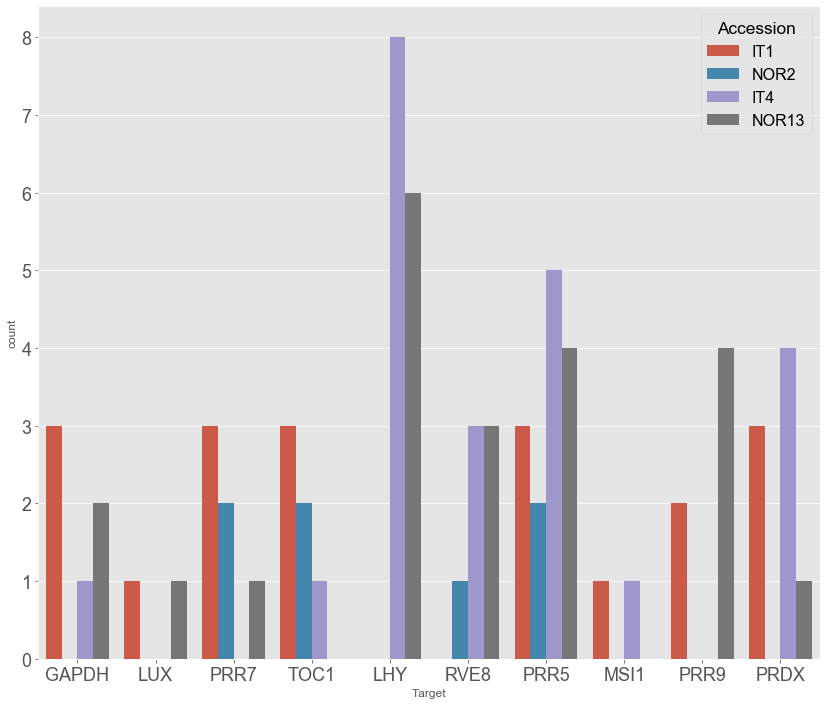

In [34]:
sb.countplot(failed_wells['Target'], hue = failed_wells['Accession'])
pp.legend(loc='upper right', title = 'Accession', fontsize=16)
# pp.savefig('Circadian_gene_results_figures/Failed_wells.jpg', dpi = 300)
pp.show()

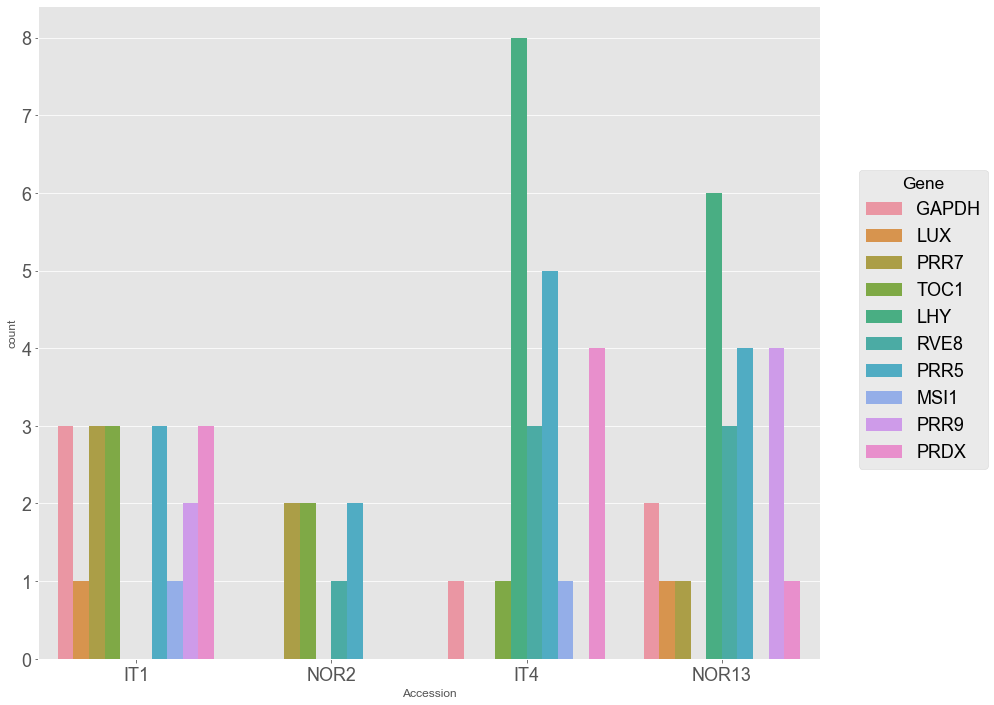

In [35]:
sb.countplot(failed_wells['Accession'], hue = failed_wells['Target'])
pp.legend(bbox_to_anchor=(1.05, 0.75), loc=2, borderaxespad=0., title = 'Gene', fontsize=18)

Identify samples where reference gene failed (nothing to compare to, inhibits downstream analysis)

In [47]:
failed_ref = failed_wells.loc[(failed_wells['Target'] == 'MSI1') | (failed_wells['Target'] == 'GAPDH')]
failed_ref

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
156,I1_13C,1,GAPDH,0.0,D-Arctic,48,24,IT1
1283,I4_3B,1,MSI1,0.0,Mid-latitude,8,8,IT4
1733,I1_12B,2,GAPDH,0.0,Mid-latitude,44,20,IT1
3283,I1_12A,3,GAPDH,0.0,Arctic,44,20,IT1
3605,I1_12D,3,MSI1,0.0,D-Mid-latitude,44,20,IT1
4651,N13_6B,3,GAPDH,0.0,Mid-latitude,20,20,NOR13
4652,N13_7A,3,GAPDH,0.0,Arctic,24,0,NOR13
4716,I4_13D,3,GAPDH,0.0,D-Mid-latitude,48,24,IT4


In [48]:
drop_samps = failed_ref[['Sample', 'Replicate']]

Drop failed wells

In [49]:
data = data[data.Cq != 0]

## Identify outliers using reference genes <a class="anchor" id="outliers"></a>

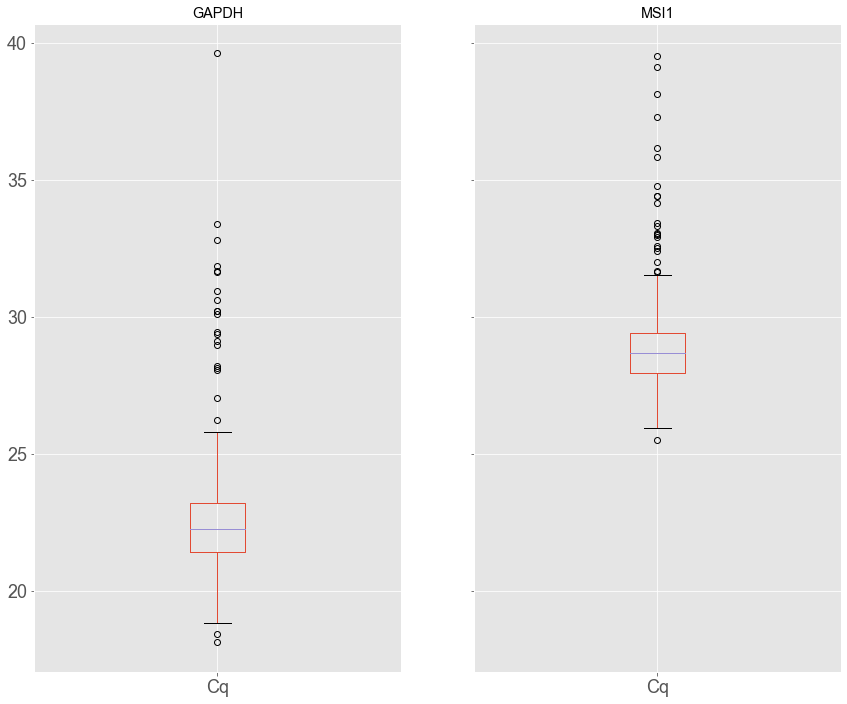

In [50]:
ref_genes = data[(data['Target']=='GAPDH') | (data['Target']=='MSI1')]

ref_genes.groupby('Target').boxplot(column='Cq')
# pp.savefig('Circadian_gene_results_figures/Ref_gene_outliers.jpg', dpi = 300)
pp.show()

In [51]:
ref_genes.loc[ref_genes['Cq'] > 30]

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
332,N2_5A,1,MSI1,31.675457,Arctic,16,16,NOR2
377,I1_8A,1,MSI1,34.160538,Arctic,28,4,IT1
390,I1_11B,1,MSI1,31.056825,Mid-latitude,40,16,IT1
399,I1_13C,1,MSI1,39.121616,D-Arctic,48,24,IT1
400,I1_13D,1,MSI1,35.847011,D-Mid-latitude,48,24,IT1
...,...,...,...,...,...,...,...,...
4379,I4_9D,3,MSI1,31.007316,D-Mid-latitude,32,8,IT4
4382,I4_10C,3,MSI1,34.421100,D-Arctic,36,12,IT4
4645,N13_3B,3,GAPDH,31.662452,Mid-latitude,8,8,NOR13
4677,N13_13D,3,GAPDH,33.375033,D-Mid-latitude,48,24,NOR13


In [52]:
bygene = ref_genes.groupby(by='Target')
bygene.describe()

Cq                                                        \
        count       mean       std        min        25%        50%   
Target                                                                
GAPDH   440.0  22.591800  2.217914  18.114577  21.423183  22.265899   
MSI1    445.0  28.892576  1.695956  25.503145  27.960188  28.663441   

                              
              75%        max  
Target                        
GAPDH   23.191409  39.619334  
MSI1    29.391472  39.503811

In [53]:
GAPDH = data[data['Target']=='GAPDH']
MSI1 = data[data['Target']=='MSI1'] 

IQR method

In [54]:
def locate_outlier_IQR(df):
    Q1=df['Cq'].quantile(0.25)
    Q3=df['Cq'].quantile(0.75)
    IQR=Q3-Q1
    outliers = df.loc[(df['Cq']>(Q3+1.5*IQR))]
    return (outliers)

In [55]:
GAPDH_outliers = locate_outlier_IQR(GAPDH)
GAPDH_outliers

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
89,N2_5A,1,GAPDH,28.186665,Arctic,16,16,NOR2
134,I1_8A,1,GAPDH,28.984997,Arctic,28,4,IT1
1501,I4_9A,1,GAPDH,30.084437,Arctic,32,8,IT4
1506,I4_10B,1,GAPDH,26.242289,Mid-latitude,36,12,IT4
1509,I4_11A,1,GAPDH,30.940667,Arctic,40,16,IT4
1515,I4_12D,1,GAPDH,29.104890,D-Mid-latitude,44,20,IT4
1704,I1_1A,2,GAPDH,30.201841,Arctic,0,0,IT1
1705,I1_1B,2,GAPDH,32.805041,Mid-latitude,0,0,IT1
1716,I1_7B,2,GAPDH,29.436695,Mid-latitude,24,0,IT1
3075,N13_7B,2,GAPDH,39.619334,Mid-latitude,24,0,NOR13


In [56]:
MSI1_outliers = locate_outlier_IQR(MSI1)
MSI1_outliers

,Sample,Replicate,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession
332,N2_5A,1,MSI1,31.675457,Arctic,16,16,NOR2
377,I1_8A,1,MSI1,34.160538,Arctic,28,4,IT1
399,I1_13C,1,MSI1,39.121616,D-Arctic,48,24,IT1
400,I1_13D,1,MSI1,35.847011,D-Mid-latitude,48,24,IT1
1248,I4_2A,1,MSI1,32.391904,Arctic,4,4,IT4
1263,I4_9A,1,MSI1,36.163812,Arctic,32,8,IT4
1268,I4_10B,1,MSI1,33.028914,Mid-latitude,36,12,IT4
1271,I4_11A,1,MSI1,32.896792,Arctic,40,16,IT4
1277,I4_12C,1,MSI1,32.523775,D-Arctic,44,20,IT4
1949,I1_1B,2,MSI1,37.285711,Mid-latitude,0,0,IT1


### Samples to be dropped

Outliers + samples where reference gene failed

In [57]:
High_GAPDH = GAPDH_outliers[['Sample', 'Replicate']]
High_MSI1 = MSI1_outliers[['Sample', 'Replicate']]

drop_refs = pd.concat([High_GAPDH, High_MSI1]).drop_duplicates().reset_index(drop=True)


# Add samples where reference genes failed, nothing to use for relative expression
drop_samples = drop_refs.append(drop_samps).drop_duplicates().reset_index(drop=True)

drop_samples.loc[drop_samples.shape[0]] = ['I4_7B', '2']
drop_samples

,Sample,Replicate
0,N2_5A,1
1,I1_8A,1
2,I4_9A,1
3,I4_10B,1
4,I4_11A,1
5,I4_12D,1
6,I1_1A,2
7,I1_1B,2
8,I1_7B,2
9,N13_7B,2


## Update dataframe

In [58]:
# merge dataframe with dropped samples to identify which are being dropped
data_update = pd.merge(data,drop_samples, on=['Sample', 'Replicate'], 
                 indicator=True, how='outer')

In [59]:
dropped = data_update[data_update['_merge']=='both']
dropped['Sample_ID'] = dropped['Sample'] + dropped['Replicate']
dropped.drop(columns = ['Sample', 'Replicate', '_merge'], inplace = True)
dropped

,Target,Cq,Treatment,Zeitgeber,ZT_24,Accession,Sample_ID
79,LHY,32.630286,Arctic,16,16,NOR2,N2_5A1
80,GAPDH,28.186665,Arctic,16,16,NOR2,N2_5A1
81,PRR9,31.193318,Arctic,16,16,NOR2,N2_5A1
82,PRDX,29.231520,Arctic,16,16,NOR2,N2_5A1
83,MSI1,31.675457,Arctic,16,16,NOR2,N2_5A1
...,...,...,...,...,...,...,...
4393,MSI1,33.412304,D-Mid-latitude,48,24,NOR13,N13_13D3
4394,TOC1,33.681369,D-Mid-latitude,48,24,NOR13,N13_13D3
4395,LUX,34.526111,D-Mid-latitude,48,24,NOR13,N13_13D3
4396,PRDX,24.903024,D-Mid-latitude,48,24,NOR13,N13_13D3


In [60]:
dropped_grouped = dropped.groupby('Sample_ID')
rp.summary_cont(dropped_grouped)

/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


Cq                                                     
            N       Mean        SD        SE  95% Conf.   Interval
Sample_ID                                                         
I1_12A3     9  27.590546  1.939826  0.646609  26.323193  28.857899
I1_12B2     9  28.351178  3.334431  1.111477  26.172683  30.529673
I1_12D3     9  28.496006  2.417693  0.805898  26.916446  30.075565
I1_13C1     7  37.628873  1.688175  0.638070  36.378255  38.879490
I1_13D1    10  28.960332  3.159424  0.999098  27.002101  30.918564
I1_1A2     10  32.618282  2.394863  0.757322  31.133930  34.102633
I1_1B2      7  35.933996  2.177923  0.823178  34.320568  37.547424
I1_7B2      8  34.939494  3.892940  1.376362  32.241825  37.637164
I1_8A1     10  33.679895  3.429013  1.084349  31.554571  35.805219
I4_10A2    10  34.122593  2.714333  0.858348  32.440232  35.804955
I4_10B1     9  30.654534  3.156749  1.052250  28.592124  32.716943
I4_10C3     8  35.350287  2.098452  0.741915  33.896134  36.804440
I4_11A1     9  33.817742  2.482582  0.827527  32.195789  35.439696
I4_11C2     8  34.100580  2.187461  0.773384  32.584747  35.616413
I4_11D2     9  34.660529  2.723060  0.907687  32.881463  36.439595
I4_12C1    10  32.323457  4.320134  1.366146  29.645810  35.001104
I4_12D1    10  28.647517  2.546294  0.805209  27.069308  30.225726
I4_13D3     7  29.540075  3.997002  1.510725  26.579055  32.501095
I4_2A1     10  30.580345  3.112007  0.984103  28.651504  32.509187
I4_3B1     10  26.735395  2.622875  0.829426  25.109720  28.361070
I4_7B2      2  30.930073  7.881470  5.573041  20.006912  41.853233
I4_9A1      9  33.463723  2.204209  0.734736  32.023640  34.903806
N13_11A3   10  28.974233  2.162030  0.683694  27.634193  30.314273
N13_13D3    8  32.718088  3.251500  1.149579  30.464913  34.971263
N13_3B3     9  32.209879  4.286928  1.428976  29.409086  35.010672
N13_6B3     9  29.660173  3.257571  1.085857  27.531893  31.788453
N13_7A3     9  28.115319  2.828308  0.942769  26.267492  29.963147
N13_7B2     3  39.303627  0.450494  0.260093  38.793845  39.813408
N13_7B3    10  32.721179  4.648605  1.470018  29.839943  35.602414
N13_8B3    10  27.322082  2.467566  0.780313  25.792669  28.851495
N13_9B2     9  33.614686  2.353645  0.784548  32.076971  35.152401
N2_4A3      9  28.359069  2.154798  0.718266  26.951267  29.766870
N2_4B3      9  31.405527  2.812454  0.937485  29.568057  33.242997
N2_5A1     10  32.094960  2.201548  0.696191  30.730426  33.459493

Remove samples from dataframe

In [61]:
remove_index = data_update[data_update['_merge']=='both'].index
data_update.drop(remove_index, inplace = True)
data_update.drop('_merge', axis=1, inplace = True)

Identify any duplicates

In [62]:
data_update.set_index(['Sample', 'Target', 'Replicate'], drop=True, inplace = True)
data_update.head()

Cq Treatment Zeitgeber ZT_24 Accession
Sample Target Replicate                                               
N2_1A  LHY    1          23.972973    Arctic         0     0      NOR2
       GAPDH  1          21.430556    Arctic         0     0      NOR2
       PRR9   1          32.956244    Arctic         0     0      NOR2
       PRDX   1          24.378550    Arctic         0     0      NOR2
       MSI1   1          28.762125    Arctic         0     0      NOR2

In [63]:
data_update[data_update.index.duplicated()]

Cq Treatment Zeitgeber ZT_24 Accession
Sample Target Replicate                                               
I1_1A  PRR5   1          30.272990    Arctic         0     0       IT1
       PRR7   3          27.708206    Arctic         0     0       IT1

In [64]:
data_update.reset_index(inplace=True)

## Check reference genes <a class="anchor" id="ref_genes"></a>

In [54]:
GAPDH = data_update[(data_update['Target']=='GAPDH')]
MSI1 = data_update[(data_update['Target']=='MSI1')] 

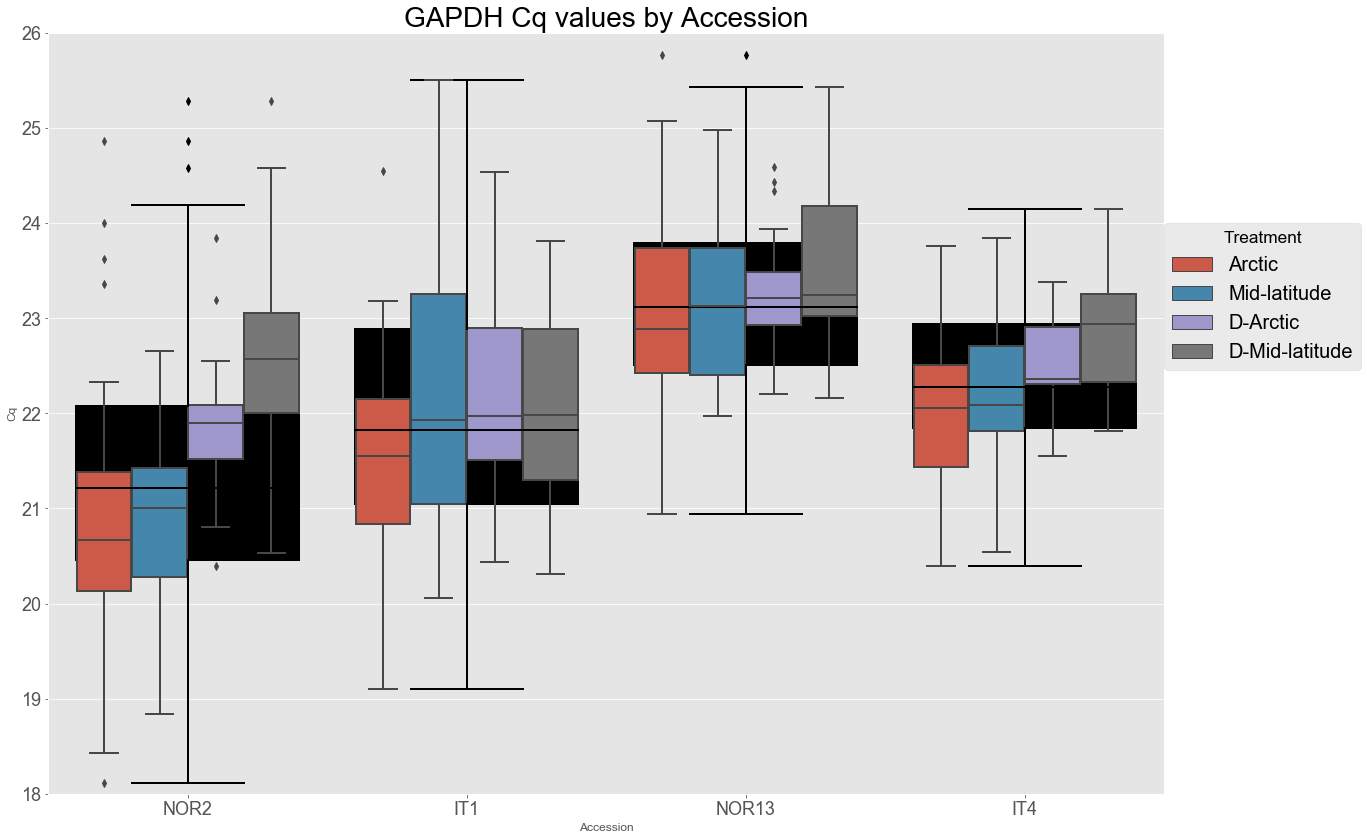

In [55]:
fig = pp.figure(figsize=(20,14))

ax1 = sb.boxplot(x='Accession', y='Cq', color='black', data = GAPDH)
ax2 = sb.boxplot(x='Accession', y='Cq', hue='Treatment', data = GAPDH)

pp.ylim(18, 26)
ax2.legend(bbox_to_anchor=(1.0, 0.75), loc=2, borderaxespad=0., title = 'Treatment')

pp.title('GAPDH Cq values by Accession', fontsize = '28')
# pp.savefig('Circadian_gene_results_figures/GAPDH_avg_Cq.jpg', dpi = 300)
pp.show()

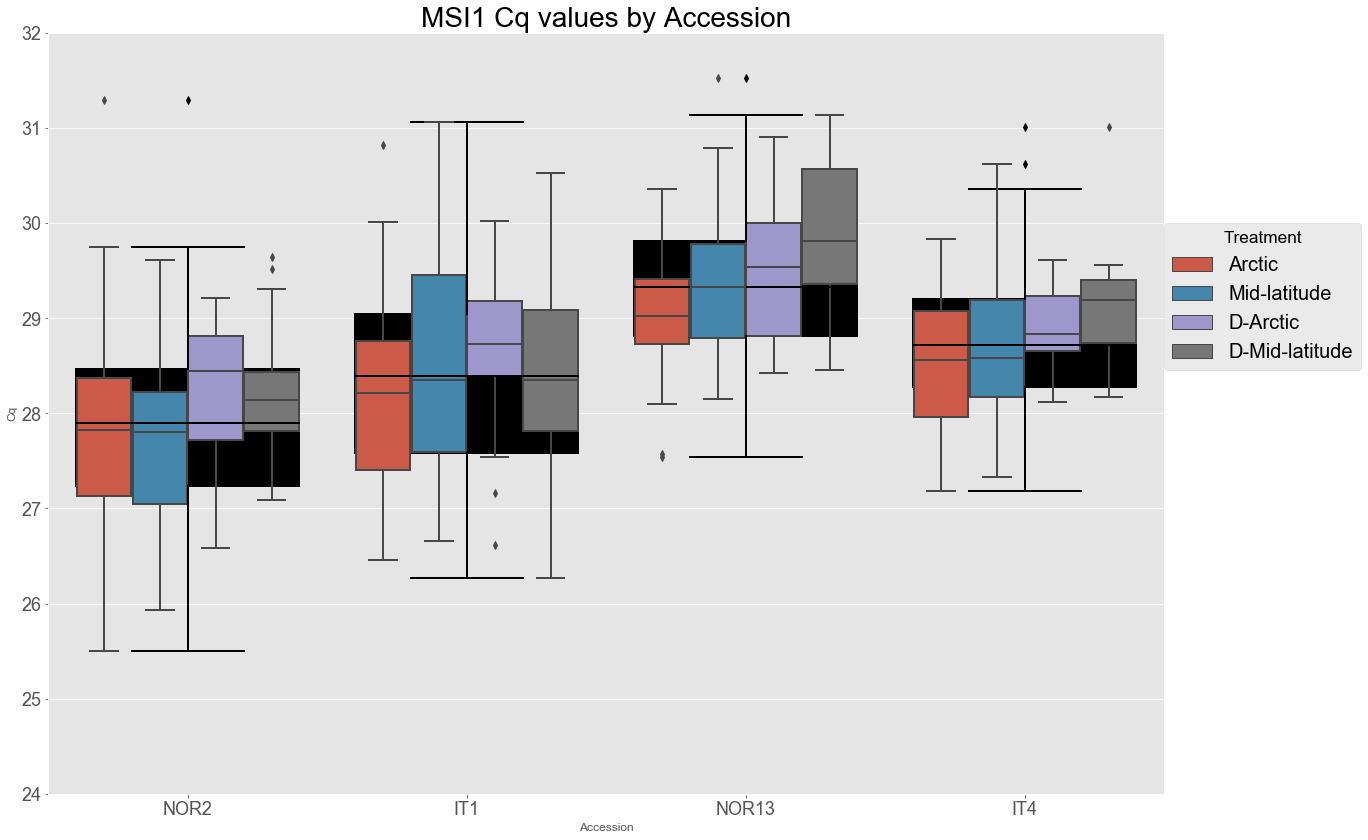

In [56]:
fig = pp.figure(figsize=(20,14))

ax1 = sb.boxplot(x='Accession', y='Cq', color='black', data = MSI1)

ax2 = sb.boxplot(x='Accession', y='Cq', hue='Treatment', data = MSI1)

pp.ylim(24,32)
ax2.legend(bbox_to_anchor=(1.0, 0.75), loc=2, borderaxespad=0., title = 'Treatment')

pp.title('MSI1 Cq values by Accession', fontsize = '28')
# pp.savefig('Circadian_gene_results_figures/MSI1_avg_Cq.jpg', dpi = 300)
pp.show()

## Reference gene statistics

### GAPDH

In [57]:
GAPDH_formula = 'Cq ~ C(Treatment) + C(Accession) + C(Treatment)*C(Accession)'
GAPDH_model = ols(GAPDH_formula, GAPDH).fit()
GAPDH_anova_table = sm.stats.anova_lm(GAPDH_model, typ=2)
GAPDH_anova_table

,sum_sq,df,F,PR(>F)
C(Treatment),39.710695,3.0,12.255864,1.101411e-07
C(Accession),197.704865,3.0,61.017414,1.843929e-32
C(Treatment):C(Accession),28.423058,9.0,2.924058,2.283622e-03
Residual,428.778311,397.0,NaN,NaN


In [58]:
# Assumption Check - Normality 
GAPDH_res = GAPDH_model.resid
stats.shapiro(GAPDH_model.resid)

ShapiroResult(statistic=0.9861940145492554, pvalue=0.0005769907147623599)

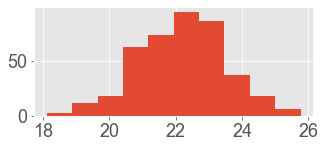

In [59]:
GAPDH['Cq'].hist(figsize=(5,2))

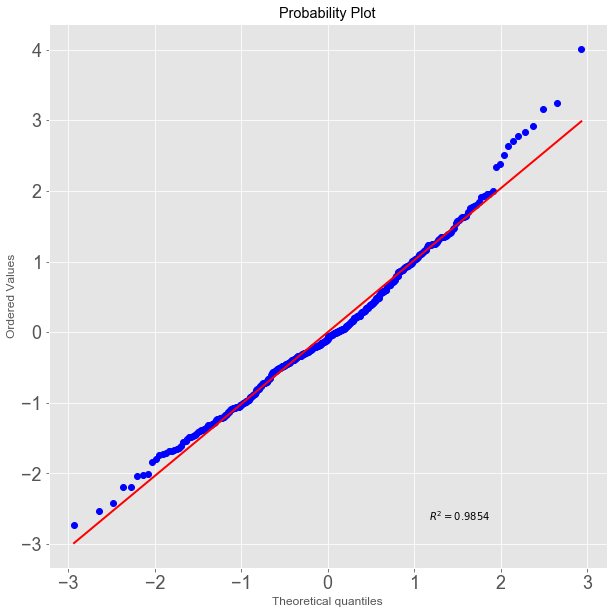

In [60]:
# Assumption Check - Residuals Plot
fig = pp.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

stats.probplot(GAPDH_res, plot=pp,rvalue=True)
pp.show()

In [61]:
GAPDH_treatment_comp = mc.MultiComparison(GAPDH['Cq'], GAPDH['Accession'])
GAPDH_t_results = GAPDH_treatment_comp.tukeyhsd()
GAPDH_t_table = pd.DataFrame(data=GAPDH_t_results._results_table.data[1:], columns=GAPDH_t_results._results_table.data[0])
GAPDH_t_sig = GAPDH_t_table.loc[GAPDH_t_table['p-adj'] < 0.05, :]
GAPDH_t_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
1,IT1,NOR13,1.2142,0.0,0.8170,1.6114,True
2,IT1,NOR2,-0.7012,0.0,-1.0928,-0.3096,True
3,IT4,NOR13,0.9326,0.0,0.5325,1.3328,True
4,IT4,NOR2,-0.9828,0.0,-1.3774,-0.5882,True
5,NOR13,NOR2,-1.9155,0.0,-2.3080,-1.5229,True


In [62]:
GAPDH_groups = GAPDH.Accession.astype(str) + '_' + GAPDH.Treatment.astype(str)

GAPDH_comp = mc.MultiComparison(GAPDH['Cq'], GAPDH_groups)
GAPDH_results = GAPDH_comp.tukeyhsd()
GAPDH_table = pd.DataFrame(data=GAPDH_results._results_table.data[1:], columns=GAPDH_results._results_table.data[0])
GAPDH_sig = GAPDH_table.loc[GAPDH_table['p-adj'] < 0.05, :]
GAPDH_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
5,IT1_Arctic,IT4_D-Mid-latitude,1.2412,0.0113,0.1399,2.3425,True
7,IT1_Arctic,NOR13_Arctic,1.5008,0.0000,0.6561,2.3454,True
8,IT1_Arctic,NOR13_D-Arctic,1.6384,0.0000,0.5838,2.6930,True
9,IT1_Arctic,NOR13_D-Mid-latitude,1.8402,0.0000,0.7856,2.8948,True
10,IT1_Arctic,NOR13_Mid-latitude,1.5087,0.0000,0.6380,2.3793,True
23,IT1_D-Arctic,NOR13_D-Mid-latitude,1.3104,0.0238,0.0812,2.5396,True
25,IT1_D-Arctic,NOR2_Arctic,-1.3147,0.0025,-2.3741,-0.2553,True
28,IT1_D-Arctic,NOR2_Mid-latitude,-1.3097,0.0021,-2.3554,-0.2641,True
36,IT1_D-Mid-latitude,NOR13_D-Mid-latitude,1.3670,0.0168,0.1188,2.6153,True
38,IT1_D-Mid-latitude,NOR2_Arctic,-1.2581,0.0071,-2.3396,-0.1766,True


Significant differences within N2 (Italy - D-Italy and Norway - D-Italy)

### MSI1

In [63]:
MSI1_formula = 'Cq ~ C(Treatment) + C(Accession) + C(Treatment)*C(Accession)'
MSI1_model = ols(MSI1_formula, MSI1).fit()
MSI1_anova_table = sm.stats.anova_lm(MSI1_model, typ=2)
MSI1_anova_table

,sum_sq,df,F,PR(>F)
C(Treatment),15.210326,3.0,6.299082,3.494101e-04
C(Accession),121.824509,3.0,50.451425,1.207006e-27
C(Treatment):C(Accession),6.668586,9.0,0.920558,5.070086e-01
Residual,319.543866,397.0,NaN,NaN


In [64]:
# Assumption Check - Normality 
MSI1_res = MSI1_model.resid
stats.shapiro(MSI1_model.resid)

ShapiroResult(statistic=0.9911720156669617, pvalue=0.014466281980276108)

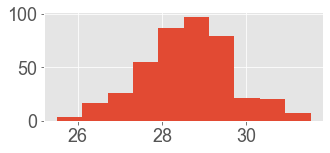

In [65]:
MSI1['Cq'].hist(figsize=(5,2))

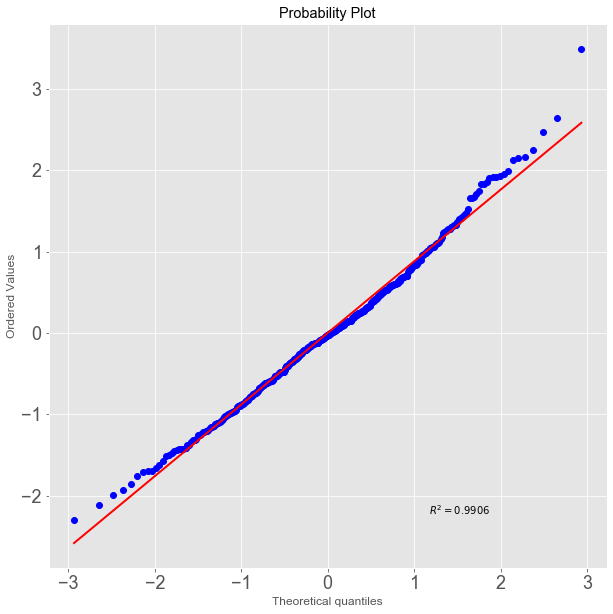

In [66]:
# Assumption Check - Residuals Plot
fig = pp.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

stats.probplot(MSI1_res, plot=pp,rvalue=True)
pp.show()

In [67]:
MSI1_treatment_comp = mc.MultiComparison(MSI1['Cq'], MSI1['Accession'])
MSI1_t_results = MSI1_treatment_comp.tukeyhsd()
MSI1_t_table = pd.DataFrame(data=MSI1_t_results._results_table.data[1:], columns=MSI1_t_results._results_table.data[0])
MSI1_t_sig = MSI1_t_table.loc[MSI1_t_table['p-adj'] < 0.05, :]
MSI1_t_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
0,IT1,IT4,0.3369,0.0441,0.0061,0.6678,True
1,IT1,NOR13,0.9647,0.0000,0.6354,1.2939,True
2,IT1,NOR2,-0.5184,0.0003,-0.8430,-0.1938,True
3,IT4,NOR13,0.6277,0.0000,0.2960,0.9594,True
4,IT4,NOR2,-0.8554,0.0000,-1.1824,-0.5283,True
5,NOR13,NOR2,-1.4831,0.0000,-1.8085,-1.1577,True


In [68]:
MSI1_groups = MSI1.Accession.astype(str) + ' ' + MSI1.Treatment.astype(str)

MSI1_comp = mc.MultiComparison(MSI1['Cq'], MSI1_groups)
MSI1_results = MSI1_comp.tukeyhsd()
MSI1_table = pd.DataFrame(data=MSI1_results._results_table.data[1:], columns=MSI1_results._results_table.data[0])
MSI1_sig = MSI1_table.loc[MSI1_table['p-adj'] < 0.05, :]
MSI1_sig

,group1,group2,meandiff,p-adj,lower,upper,reject
5,IT1 Arctic,IT4 D-Mid-latitude,0.9704,0.0399,0.0197,1.9212,True
7,IT1 Arctic,NOR13 Arctic,0.8775,0.0041,0.1483,1.6067,True
8,IT1 Arctic,NOR13 D-Arctic,1.3603,0.0000,0.4499,2.2708,True
9,IT1 Arctic,NOR13 D-Mid-latitude,1.7054,0.0000,0.7949,2.6158,True
10,IT1 Arctic,NOR13 Mid-latitude,1.2152,0.0000,0.4636,1.9669,True
23,IT1 D-Arctic,NOR13 D-Mid-latitude,1.2768,0.0042,0.2157,2.3380,True
28,IT1 D-Arctic,NOR2 Mid-latitude,-0.9175,0.0419,-1.8202,-0.0148,True
35,IT1 D-Mid-latitude,NOR13 D-Arctic,1.1582,0.0215,0.0806,2.2358,True
36,IT1 D-Mid-latitude,NOR13 D-Mid-latitude,1.5032,0.0002,0.4256,2.5808,True
37,IT1 D-Mid-latitude,NOR13 Mid-latitude,1.0131,0.0229,0.0659,1.9604,True


No significant differences within accessions. 

In [65]:
data2 = data_update.copy()
data2.set_index(["Sample", 'Replicate'], drop=True, inplace = True)
data2

Target         Cq     Treatment Zeitgeber ZT_24 Accession
Sample Replicate                                                          
N2_1A  1            LHY  23.972973        Arctic         0     0      NOR2
       1          GAPDH  21.430556        Arctic         0     0      NOR2
       1           PRR9  32.956244        Arctic         0     0      NOR2
       1           PRDX  24.378550        Arctic         0     0      NOR2
       1           MSI1  28.762125        Arctic         0     0      NOR2
...                 ...        ...           ...       ...   ...       ...
I4_2B  3           MSI1  28.408805  Mid-latitude         4     4       IT4
       3           TOC1  28.897120  Mid-latitude         4     4       IT4
       3            LUX  31.606425  Mid-latitude         4     4       IT4
       3           PRDX  23.439644  Mid-latitude         4     4       IT4
       3          GAPDH  21.144145  Mid-latitude         4     4       IT4

[4103 rows x 6 columns]

# Transforming final datafrmae

## Calculate ΔCq & 2 <sup>-ΔCq <a class="anchor" id="delta_Cq"></a>

Calculate delta Cq from geometric mean of two reference genes: MSI1 and GAPDH

## ΔCq 

#### Target gene (Cq) - Reference gene (geometric mean of Cq)

In [66]:
def apply_delta_Cq_geom(df, ref1, ref2):
    
    '''Determines delta Cq of each sample based on reference gene geometric mean 
    
    df: Dataframe with index: sample, columns: Target, Cq
    
    ref: reference gene to use for calculation. Must be a string
    
    '''
    ref_gene = df[(df['Target']==ref1) | (df['Target']==ref2)]

    ref_gene.reset_index(inplace=True)
    ref_gene.set_index(['Sample', 'Replicate', 'Target'], inplace = True)
    ref_gene = ref_gene.unstack(level=2)

    # Get geometric mean of reference genes
    ref_gene[(       'Cq_mean', 'gmean')] = gmean([ref_gene[(       'Cq', ref1)], 
                                                            ref_gene[(       'Cq',  ref2)]])
    ref_gene = ref_gene.stack(level=1)
    ref_gene.reset_index(inplace=True)
    ref_gene.set_index(['Sample', 'Replicate'], inplace = True)
    
    # Subtract geometric mean from target Cq values
    df.sort_index(inplace=True)
    d2 = (df.Cq - ref_gene.loc[ref_gene['Target']=='gmean']['Cq_mean'])
    df['delta_Cq'] = d2.values

    return df

In [67]:
# def apply_delta_Cq_mean(df, ref1, ref2):
    
#     '''Determines delta Cq of each sample based on reference gene geometric mean 
    
#     df: Dataframe with index: sample, columns: Target, Cq
    
#     ref: reference gene to use for calculation. Must be a string
    
#     '''
#     ref_gene = df[(df['Target']==ref1) | (df['Target']==ref2)]

#     ref_gene.reset_index(inplace=True)
#     ref_gene.set_index(['Sample', 'Replicate', 'Target'], inplace = True)
#     ref_gene = ref_gene.unstack(level=2)

#     # Get geometric mean of reference genes
#     ref_gene[(       'Cq_mean', 'mean')] = ref_gene[[(       'Cq', ref1), 
#                                                       (       'Cq',  ref2)]].mean(axis=1)
#     ref_gene = ref_gene.stack(level=1)
#     ref_gene.reset_index(inplace=True)
#     ref_gene.set_index(['Sample', 'Replicate'], inplace = True)
    
#     # Subtract geometric mean from target Cq values
#     df.sort_index(inplace=True)
#     d2 = (df.Cq - ref_gene.loc[ref_gene['Target']=='mean']['Cq_mean'])
#     df['delta_Cq'] = d2.values

#     return df

In [68]:
apply_delta_Cq_geom(data2, 'GAPDH', 'MSI1')

Target         Cq       Treatment Zeitgeber ZT_24 Accession  \
Sample Replicate                                                               
I1_10A 1            LHY  24.282946          Arctic        36    12       IT1   
       1          GAPDH  21.278777          Arctic        36    12       IT1   
       1           PRR9  24.430283          Arctic        36    12       IT1   
       1           PRDX  22.831522          Arctic        36    12       IT1   
       1           MSI1  26.854128          Arctic        36    12       IT1   
...                 ...        ...             ...       ...   ...       ...   
N2_9D  3           MSI1  28.106467  D-Mid-latitude        32     8      NOR2   
       3           PRR7  27.157224  D-Mid-latitude        32     8      NOR2   
       3           PRR5  27.408761  D-Mid-latitude        32     8      NOR2   
       3           RVE8  24.546936  D-Mid-latitude        32     8      NOR2   
       3           TOC1  28.409097  D-Mid-latitude        32     8      NOR2   

                  delta_Cq  
Sample Replicate            
I1_10A 1          0.378490  
       1         -2.625678  
       1          0.525827  
       1         -1.072934  
       1          2.949672  
...                    ...  
N2_9D  3          3.788659  
       3          2.839416  
       3          3.090953  
       3          0.229128  
       3          4.091289  

[4103 rows x 7 columns]

## 2<sup/>-ΔCq 

In [69]:
data2['2delta_Cq'] = data2['delta_Cq'].apply(lambda x: 2 ** -(x))

#### Set zeitgeber and zt_24 as index, 0-48 and 0-24

In [70]:
data2.reset_index(inplace=True)
data2.Zeitgeber = pd.to_numeric(data2.Zeitgeber)
data2.ZT_24 = pd.to_numeric(data2.ZT_24)
data2.sort_values(["Zeitgeber", 'ZT_24', 'Sample', 'Replicate'], inplace = True)
data2.set_index('Zeitgeber', inplace=True)

In [71]:
data2

,Sample,Replicate,Target,Cq,Treatment,ZT_24,Accession,delta_Cq,2delta_Cq
Zeitgeber,,,,,,,,,
0,I1_1A,1,LHY,21.915832,Arctic,0,IT1,-2.688863,6.448049
0,I1_1A,1,GAPDH,21.834811,Arctic,0,IT1,-2.769884,6.820532
0,I1_1A,1,PRR9,32.813400,Arctic,0,IT1,8.208705,0.003380
0,I1_1A,1,PRDX,22.368548,Arctic,0,IT1,-2.236147,4.711370
0,I1_1A,1,MSI1,27.725956,Arctic,0,IT1,3.121262,0.114923
...,...,...,...,...,...,...,...,...,...
48,N2_13D,3,MSI1,28.323940,D-Mid-latitude,24,NOR2,3.854101,0.069151
48,N2_13D,3,PRR7,25.474186,D-Mid-latitude,24,NOR2,1.004346,0.498496
48,N2_13D,3,PRR5,26.425477,D-Mid-latitude,24,NOR2,1.955638,0.257807


### Save new dataframe to excel

In [72]:
data2.to_excel('qPCR_data_final.xlsx')

# Analyze target data <a class="anchor" id="target_genes"></a>

Drop Reference genes

In [73]:
data2 = data2[data2.Target != 'GAPDH']
data2 = data2[data2.Target != 'MSI1']

In [93]:
data2 = data2.drop(data2[data2['Target'] == 'PRDX'].index)

Check that replicates have similar values

In [74]:
rp.summary_cont(data2.groupby("Replicate")['Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Replicate,,,,,,
1,1116,27.601135,3.119774,0.093388,27.418013,27.784258
2,1073,27.498494,3.100940,0.094666,27.312863,27.684126
3,1088,27.606644,3.096829,0.093886,27.422542,27.790746


In [75]:
rp.summary_cont(data2.groupby("Replicate")['2delta_Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Replicate,,,,,,
1,1116,1.125694,2.677364,0.080145,0.968540,1.282848
2,1073,1.450699,4.006642,0.122315,1.210849,1.690549
3,1088,0.895117,1.911788,0.057960,0.781464,1.008770


In [76]:
Target_groups = rp.summary_cont(data2.groupby(['Target', 'Accession']))
Target_groups

/Users/corinefaehn/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


Cq                                                       \
                    N       Mean        SD        SE  95% Conf.   Interval   
Target Accession                                                             
LHY    IT1        103  24.399956  2.581632  0.254376  23.901380  24.898533   
       IT4         99  28.591270  2.099511  0.211009  28.177693  29.004847   
       NOR13      102  28.977947  2.659654  0.263345  28.461791  29.494103   
       NOR2       108  24.168503  2.370455  0.228097  23.721433  24.615573   
LUX    IT1        102  30.329341  2.001780  0.198206  29.940858  30.717825   
       IT4         99  30.228211  1.901009  0.191059  29.853736  30.602686   
       NOR13      102  30.852069  1.955160  0.193590  30.472633  31.231505   
       NOR2       107  29.470304  1.700710  0.164414  29.148053  29.792555   
PRDX   IT1        100  24.016242  1.432181  0.143218  23.735535  24.296950   
       IT4         98  22.855051  1.295014  0.130816  22.598651  23.111450   
       NOR13      102  23.237817  1.616581  0.160065  22.924089  23.551546   
       NOR2       108  24.016023  1.598738  0.153839  23.714499  24.317547   
PRR5   IT1        102  27.853363  2.673265  0.264693  27.334566  28.372161   
       IT4         96  26.294375  2.164963  0.220961  25.861292  26.727458   
       NOR13      102  26.974902  2.359507  0.233626  26.516995  27.432809   
       NOR2       105  27.865146  2.344641  0.228814  27.416671  28.313620   
PRR7   IT1        103  26.903628  2.039366  0.200945  26.509777  27.297480   
       IT4        100  27.439924  1.672807  0.167281  27.112054  27.767795   
       NOR13      102  27.989742  1.694600  0.167790  27.660872  28.318611   
       NOR2       105  26.760981  1.709189  0.166800  26.434054  27.087909   
PRR9   IT1        102  28.840286  3.622535  0.358684  28.137265  29.543307   
       IT4        100  30.285367  3.190874  0.319087  29.659955  30.910778   
       NOR13      102  30.725234  3.476356  0.344211  30.050581  31.399886   
       NOR2       108  29.066346  3.472071  0.334100  28.411509  29.721182   
RVE8   IT1        103  27.441949  2.399291  0.236409  26.978587  27.905311   
       IT4        100  27.860502  1.852829  0.185283  27.497348  28.223657   
       NOR13      101  28.422419  2.556616  0.254393  27.923809  28.921029   
       NOR2       107  27.336855  2.270137  0.219462  26.906708  27.767001   
TOC1   IT1        102  28.503983  1.224559  0.121249  28.266334  28.741632   
       IT4         99  28.519162  2.765632  0.277957  27.974368  29.063957   
       NOR13      102  28.257652  1.051363  0.104100  28.053615  28.461689   
       NOR2       106  27.886986  1.115142  0.108312  27.674694  28.099278   

                 ZT_24                                 ...  delta_Cq  \
                     N       Mean        SD        SE  ...        SD   
Target Accession                                       ...             
LHY    IT1         103  12.038835  7.205557  0.709985  ...  2.326325   
       IT4          99  11.838384  7.535910  0.757387  ...  2.174088   
       NOR13       102  12.352941  7.188615  0.711779  ...  2.416728   
       NOR2        108  12.037037  7.587405  0.730098  ...  2.046604   
LUX    IT1         102  12.078431  7.229870  0.715864  ...  1.859456   
       IT4          99  11.878788  7.590640  0.762888  ...  1.728853   
       NOR13       102  12.352941  7.188615  0.711779  ...  1.959406   
       NOR2        107  12.112150  7.582660  0.733043  ...  1.863305   
PRDX   IT1         100  11.680000  7.001991  0.700199  ...  0.939925   
       IT4          98  11.714286  7.472286  0.754815  ...  1.216879   
       NOR13       102  12.352941  7.188615  0.711779  ...  1.346343   
       NOR2        108  12.037037  7.587405  0.730098  ...  1.048920   
PRR5   IT1         102  12.039216  7.241139  0.716980  ...  2.254861   
       IT4          96  11.958333  7.622566  0.777975  ...  2.014653   
       NOR13       102  12.352941  7.188615  0.711779  ...  2.30

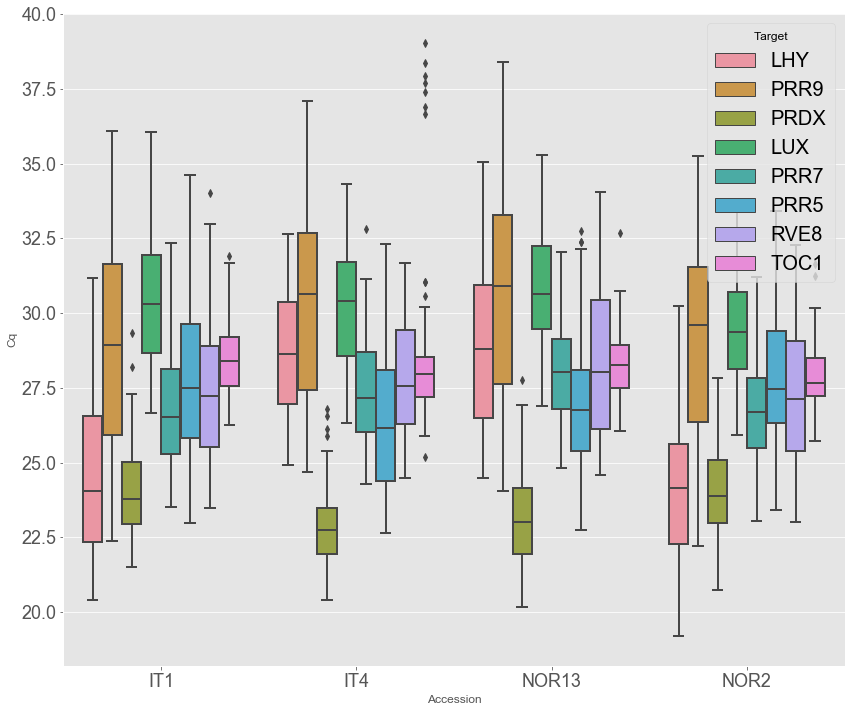

In [81]:
sb.boxplot(data=data2, x='Accession', y='Cq', hue ='Target')

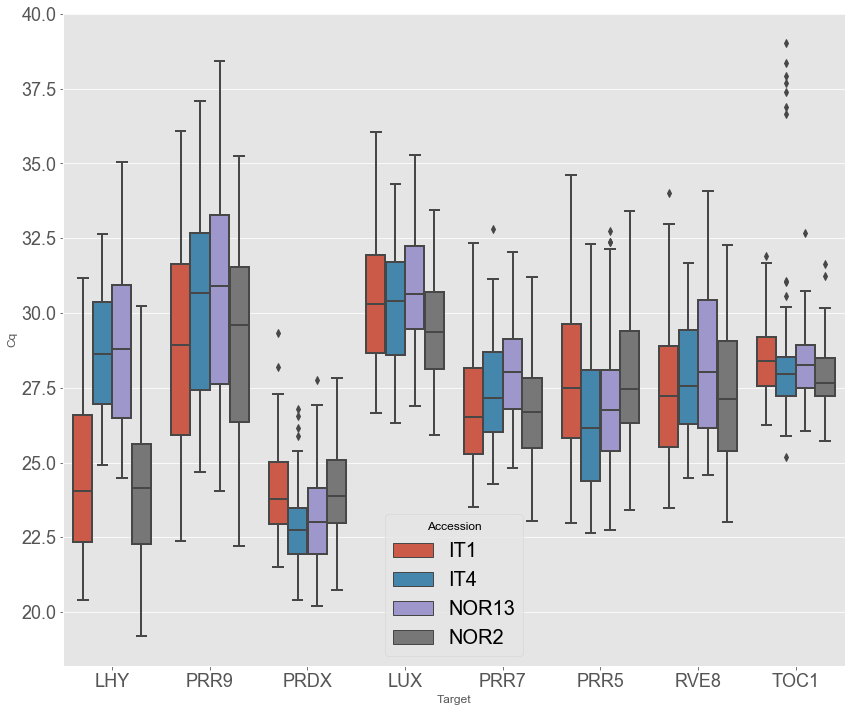

In [82]:
sb.boxplot(data=data2, x='Target', y='Cq', hue ='Accession')

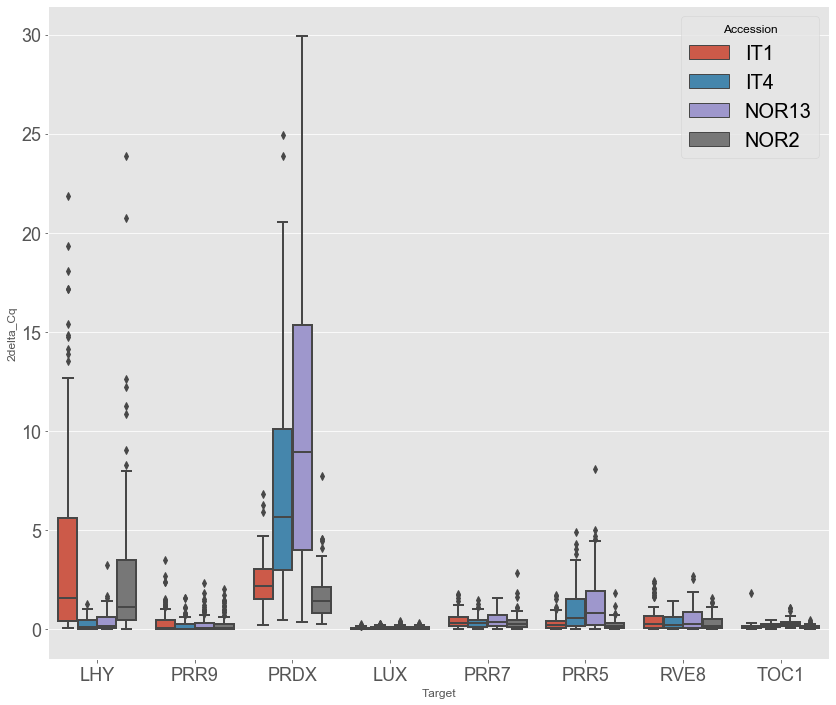

In [83]:
sb.boxplot(data=data2, x='Target', y='2delta_Cq', hue ='Accession')

In [84]:
rp.summary_cont(data2.groupby("Target")['Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LHY,412,26.479806,3.319157,0.163523,26.158911,26.800701
LUX,410,30.210779,1.949007,0.096255,30.021889,30.399668
PRDX,408,23.542664,1.571877,0.077820,23.389951,23.695378
PRR5,405,27.265638,2.474236,0.122946,27.024366,27.506910
PRR7,410,27.268105,1.844745,0.091105,27.089320,27.446889
PRR9,412,29.716954,3.523989,0.173614,29.376256,30.057652
RVE8,411,27.757369,2.317401,0.114309,27.533051,27.981688
TOC1,409,28.286319,1.693724,0.083749,28.121969,28.450668


In [85]:
rp.summary_cont(data2.groupby("Target")['2delta_Cq'])

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LHY,412,1.907289,3.694179,0.181999,1.550137,2.264441
LUX,410,0.060905,0.068620,0.003389,0.054254,0.067555
PRDX,408,5.356535,5.835421,0.288896,4.789603,5.923467
PRR5,405,0.700503,1.017496,0.050560,0.601283,0.799723
PRR7,410,0.396229,0.375266,0.018533,0.359860,0.432599
PRR9,412,0.261020,0.466504,0.022983,0.215918,0.306121
RVE8,411,0.401367,0.482800,0.023815,0.354633,0.448100
TOC1,409,0.175701,0.163493,0.008084,0.159837,0.191566


In [86]:
display(rp.summary_cont(data2.groupby("Accession")['Cq']))

,N,Mean,SD,SE,95% Conf.,Interval
Accession,,,,,,
IT1,817,27.290288,3.095199,0.108287,27.077915,27.502662
IT4,791,27.773906,3.124002,0.111077,27.556058,27.991755
NOR13,815,28.179425,3.194439,0.111896,27.959973,28.398876
NOR2,854,27.064665,2.893537,0.099015,26.870482,27.258848


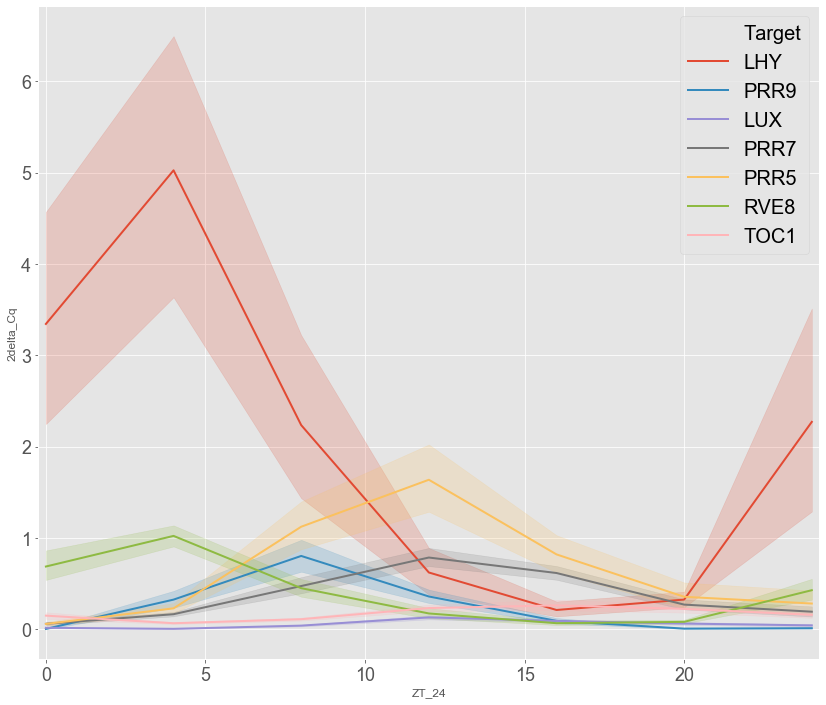

In [95]:
sb.lineplot(data = data2, x = 'ZT_24', y = '2delta_Cq', hue = 'Target')

In [86]:
from statsmodels.graphics.factorplots import interaction_plot

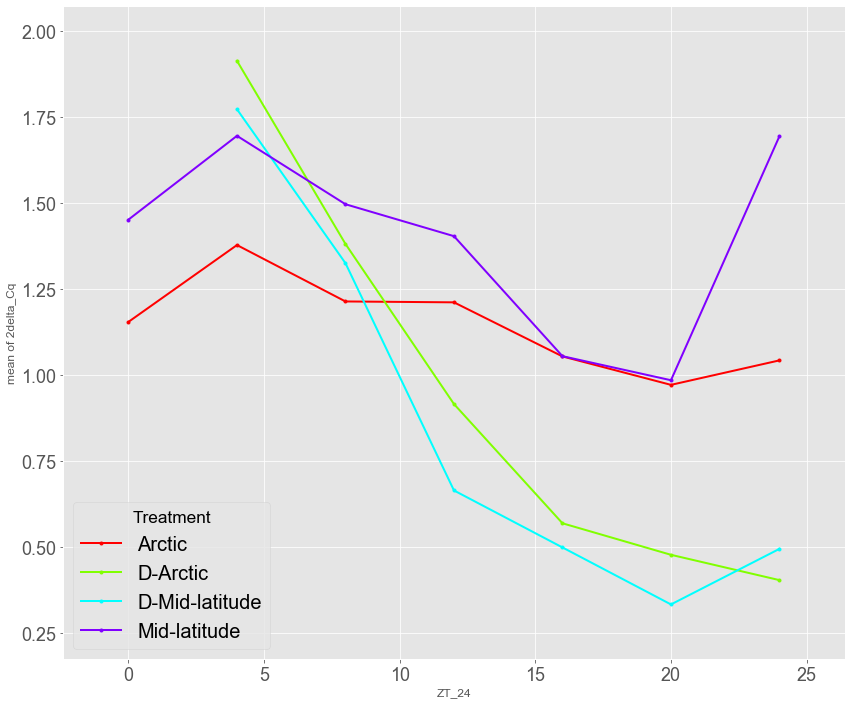

In [87]:
fig = interaction_plot(x = data2['ZT_24'], trace = data2['Treatment'], response = data2['2delta_Cq'])
pp.show()

In [77]:
data2.reset_index(inplace = True)

In [78]:
# data2.sort_values(by = ['ZT_24'], ascending = True)

,Zeitgeber,Sample,Replicate,Target,Cq,Treatment,ZT_24,Accession,delta_Cq,2delta_Cq
0,0,I1_1A,1,LHY,21.915832,Arctic,0,IT1,-2.688863,6.448049
1141,24,N13_7B,1,PRR7,31.688848,Mid-latitude,0,NOR13,5.586016,0.020818
1142,24,N13_7B,1,PRR5,32.150000,Mid-latitude,0,NOR13,6.047168,0.015122
1143,24,N13_7B,1,TOC1,29.103520,Mid-latitude,0,NOR13,3.000688,0.124940
1144,24,N13_7B,1,LUX,33.525437,Mid-latitude,0,NOR13,7.422605,0.005829
...,...,...,...,...,...,...,...,...,...,...
3049,48,I4_13B,1,PRDX,21.601876,Mid-latitude,24,IT4,-3.129244,8.749762
3048,48,I4_13B,1,LUX,32.753497,Mid-latitude,24,IT4,8.022377,0.003846
3047,48,I4_13B,1,TOC1,28.113453,Mid-latitude,24,IT4,3.382334,0.095899
3055,48,I4_13B,2,TOC1,28.174669,Mid-latitude,24,IT4,3.348775,0.098156


In [79]:
data2 = data2.sort_values(by = ['Treatment', 'ZT_24'], ascending = (True, True)) #, inplace = True
data2.tail()

,Zeitgeber,Sample,Replicate,Target,Cq,Treatment,ZT_24,Accession,delta_Cq,2delta_Cq
3224,48,N2_13B,3,PRDX,23.085818,Mid-latitude,24,NOR2,-0.650046,1.569218
3225,48,N2_13B,3,PRR7,30.241095,Mid-latitude,24,NOR2,6.505232,0.011009
3226,48,N2_13B,3,PRR5,32.032950,Mid-latitude,24,NOR2,8.297087,0.003179
3227,48,N2_13B,3,RVE8,24.831301,Mid-latitude,24,NOR2,1.095437,0.467994
3228,48,N2_13B,3,TOC1,28.286258,Mid-latitude,24,NOR2,4.550394,0.042677


## Plot function

In [81]:
def plot_gene_24h(df, target_gene): 
    
    fig, ax = pp.subplots(2, 2, figsize = (18, 14), sharex = True, sharey = True) 
    gene_data = df.loc[df['Target']==target_gene] 
    
    ## MID-LATITUDE PHOTOPERIOD 
    ml_dark = gene_data[gene_data['Treatment'] == 'D-Mid-latitude'] 
    ml_dark_groups = ml_dark.groupby('Treatment')
    
    for name, group in ml_dark_groups:
        ml_dark_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
        ml_dark_x = ml_dark_result.index.levels[0] # Zeitgebers for x-axis
        ml_dark_accessions = ml_dark_result.index.levels[1] # Accessions for separate y-values
    
        for accession in ml_dark_accessions:
            ml_dark_avg_data = ml_dark_result.loc[[(zeitgeber, accession) for zeitgeber in ml_dark_x], ('2delta_Cq', 'mean')] 
            ml_dark_err_data = ml_dark_result.loc[[(zeitgeber, accession) for zeitgeber in ml_dark_x], ('2delta_Cq',  'std')] 
            
            ax[0,1].errorbar(ml_dark_x, ml_dark_avg_data, ml_dark_err_data, fmt = '-o',
                                  lw = 3, label = str(accession))

            ax[0,1].set_ylim(0, gene_data['2delta_Cq'].max())
 
        
    ml = gene_data[gene_data['Treatment'] == 'Mid-latitude'] 
    ml_groups = ml.groupby('Treatment')
    
    for name, group in ml_groups:
        ml_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
        ml_x = ml_result.index.levels[0] # Zeitgebers for x-axis
        ml_accessions = ml_result.index.levels[1] # Accessions for separate y-values
        
        for accession in ml_accessions:
            ml_avg_data = ml_result.loc[[(zeitgeber, accession) for zeitgeber in ml_x], ('2delta_Cq', 'mean')] 
            ml_err_data = ml_result.loc[[(zeitgeber, accession) for zeitgeber in ml_x], ('2delta_Cq',  'std')]
           
            ax[0,0].errorbar(ml_x, ml_avg_data, ml_err_data, fmt = '-o',
                                  lw = 3, label = str(accession))

            ax[0,0].set_ylim(0, gene_data['2delta_Cq'].max())
            ax[0,0].set_ylabel("Relative Expression", fontsize = '20') 

    ## ARCTIC PHOTOPERIOD 
    ar_dark = gene_data[gene_data['Treatment'] == 'D-Arctic'] 
    ar_dark_groups = ar_dark.groupby('Treatment')
    
    for name, group in ar_dark_groups:
        ar_dark_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
        ar_dark_x = ar_dark_result.index.levels[0] # Zeitgebers for x-axis
        ar_dark_accessions = ar_dark_result.index.levels[1] # Accessions for separate y-values        
        
        for accession in ar_dark_accessions:
            ar_dark_avg_data = ar_dark_result.loc[[(zeitgeber, accession) for zeitgeber in ar_dark_x], ('2delta_Cq', 'mean')] 
            ar_dark_err_data = ar_dark_result.loc[[(zeitgeber, accession) for zeitgeber in ar_dark_x], ('2delta_Cq',  'std')]

            ax[1,1].errorbar(ar_dark_x, ar_dark_avg_data, ar_dark_err_data, fmt = '-o',
                                  lw = 3, label = str(accession)) 
            ax[1,1].set_xticks(ar_dark_x)
            ax[1,1].set_xlabel("Zeitgeber", fontsize = '20')
            ax[1,1].set_ylim(0, gene_data['2delta_Cq'].max())
    
    ar = gene_data[gene_data['Treatment'] == 'Arctic'] 
    ar_groups = ar.groupby('Treatment')
    
    for name, group in ar_groups:
        ar_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
        ar_x = ar_result.index.levels[0] # Zeitgebers for x-axis
        ar_accessions = ar_result.index.levels[1] # Accessions for separate y-values        
        
        for accession in ar_accessions:
            ar_avg_data = ar_result.loc[[(zeitgeber, accession) for zeitgeber in ar_x], ('2delta_Cq', 'mean')] 
            ar_err_data = ar_result.loc[[(zeitgeber, accession) for zeitgeber in ar_x], ('2delta_Cq',  'std')]
    
            ax[1,0].errorbar(ar_x, ar_avg_data, ar_err_data, fmt = '-o',
                                  lw = 3, label = str(accession))   
            ax[1,0].set_xticks(ar_x)
            ax[1,0].set_xlabel("Zeitgeber", fontsize = '20')
            ax[1,0].set_ylim(0, gene_data['2delta_Cq'].max())
            ax[1,0].set_ylabel("Relative Expression", fontsize = '20') 
     
    
    handles, labels = ax[1,1].get_legend_handles_labels()
    ax[1,1].legend(handles[:], labels[:], 
               borderaxespad=0., bbox_to_anchor=(1.05, 1.25), 
               title='Accession', loc = 2, fontsize = '18', title_fontsize = '20')    
    fig.suptitle(t = target_gene, fontsize = '36')
    pp.subplots_adjust(hspace=.0, wspace = .05)
    pp.savefig(target_gene + "24h_expression.png", dpi=300, bbox_inches='tight')
#     return fig

In [82]:
# from scipy.interpolate import splrep

In [1]:
# fig = pp.figure(figsize= (10, 10))
# ax = fig.add_subplot(111)

# gene_data = data2[data2['Target'] == 'LHY']

# ar = gene_data[gene_data['Treatment'] == 'Arctic'] 
# ar_groups = ar.groupby('Treatment')

# for name, group in ar_groups:
#     ar_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : 'mean'})
#     ar_x = ar_result.index.levels[0] # Zeitgebers for x-axis
#     ar_accessions = ar_result.index.levels[1] # Accessions for separate y-values 

#     for accession in ar_accessions:
#         ar_avg_data = ar_result.loc[[(zeitgeber, accession) for zeitgeber in ar_x], '2delta_Cq'] 

#         ax.scatter(ar_x, ar_avg_data, label = str(accession))   
#         ax.set_xticks(ar_x)
#         ax.set_xlabel("Zeitgeber", fontsize = '20')
#         ax.set_ylim(0, ar['2delta_Cq'].max())
#         ax.set_ylabel("Relative Expression", fontsize = '20')
                
#         ar_x_new = np.linspace(ar_x.min(), ar_x.max(), 7)
#         power_smooth = splrep(ar_x, ar_avg_data, ar_x_new)
    
#         pp.plot(ar_x_new, power_smooth)
#         pp.show()

In [145]:
# def plot_gene(df, target_gene):
        
#     '''Plot data for specified target gene by individual accession

#     Groups data by two treatments (Mid-latitude and Arctic) including respective dark treatments.
    
#     :param df: DataFrame
#     :param target_gene: gene name to pull from targets
#     :return: 2 figures for gene and treatments
#     '''  
    
#     # Set figure to have 2 subplots
#     fig, (ax1, ax2) = pp.subplots(2, 1, figsize = (16,14)) 
    
#     #Pull data for specified target gene from dataframe
#     gene_data = df.loc[df['Target']==target_gene] 
    
#     #Set label for treatment names for legend
#     legend_dict = {'D-Arctic' : '-D', 'D-Mid-latitude': '-D', 'Mid-latitude': ' ', 'Arctic': ' '}
    
#     # Plot Mid-latitude on ax1, Arctic on ax2
#     It = gene_data[gene_data['Treatment'].str.contains('Mid-latitude')] 
#     It_groups = It.groupby('Treatment')

#     for name, group in It_groups: # name = treatment group = data for treatment
        
#         It_result = group.groupby(['Zeitgeber', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']}) #groupby sample within treatment
#         It_x = It_result.index.levels[0] # Zeitgebers for x-axis
#         It_accessions = It_result.index.levels[1] # Accessions for separate y-values

#         for accession in It_accessions:
            
#             # Pulls mean 2^-Cq for each accession & zeitgeber (y-values)
#             It_avg_data = It_result.loc[[(zeitgeber, accession) for zeitgeber in It_x], ('2delta_Cq', 'mean')] 
#             # Pulls std of mean 2^-Cq for each accession & zeitgeber 
#             It_err_data = It_result.loc[[(zeitgeber, accession) for zeitgeber in It_x], ('2delta_Cq',  'std')] 
            
#             # Set label names to legend items for legend 
#             label1 = ""
#             if name in legend_dict.keys():
#                 label1 = str(legend_dict[name])
#             else: label1= ' '
            
#             ## PLOT 
#             It_plot = ax1.errorbar(It_x, It_avg_data, yerr = It_err_data, fmt = '-o',
#                                    lw = 3, label = str(accession) + str(label1))
#             ax1.set_xticks(It_x)
# #             ax1.set_title('Mid-latitude', x=0.07, y=0.9, fontsize = '20')
#             ax1.set_ylim(0, gene_data['2delta_Cq'].max())
#             ax1.set_ylabel("Relative Expression")   

            
#     # Plotting Arctic ax2
#     No = gene_data[gene_data['Treatment'].str.contains('Arctic')] 
#     No = No.sort_values(by = 'Treatment', ascending = False)
#     No_groups = No.groupby('Treatment', sort = False)
    
#     for name, group in No_groups:
#         Norway_result = group.groupby(['Zeitgeber', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
#         No_x = Norway_result.index.levels[0]
#         No_accessions = Norway_result.index.levels[1]

#         for accession in No_accessions:
#             No_avg_data = Norway_result.loc[[(zeitgeber, accession) for zeitgeber in No_x], ('2delta_Cq', 'mean')] 
#             No_err_data = Norway_result.loc[[(zeitgeber, accession) for zeitgeber in No_x], ('2delta_Cq',  'std')] 
            
#             label2 = ""
#             if name in legend_dict.keys():
#                 label2 = str(legend_dict[name])
#             else: label2= ' '
              
#             ## PLOT
#             No_plot = ax2.errorbar(No_x, No_avg_data, No_err_data, fmt = '-o', 
#                                    lw = 3, label = str(accession) + str(label2))
#             ax2.set_xticks(No_x)
# #             ax2.set_title('Arctic', x=0.05, y=0.9, fontsize = '20')
#             ax2.set_xlabel("Zeitgeber")
#             ax2.set_ylim(0, df['2delta_Cq'].max())
#             ax2.set_ylabel("Relative Expression")
            
#     ## LEGEND
#     handles, labels = ax1.get_legend_handles_labels()
#     ax1.legend(handles[::-1], labels[::-1], 
#                borderaxespad=0., bbox_to_anchor=(1.05, 0.25), 
#                title='Accession', loc = 2)    
 
#     fig.suptitle(t = target_gene, fontsize = '36')
#     pp.subplots_adjust(hspace=.0)
#     pp.savefig(target_gene + "_expression.png", dpi=300, bbox_inches='tight')
#     return fig, (ax1, ax2)

In [146]:
# def plot_gene_24h_sameplot(df, target_gene):

#     '''Plot data for specified target gene by individual accession

#     Groups data by two treatments (Mid-latitude and Arctic) including respective dark treatments.
    
#     :param df: DataFrame
#     :param target_gene: gene name to pull from targets
#     :return: 2 figures for gene and treatments
#     '''  
    
#     # Set figure to have 2 subplots
#     fig, (ax1, ax2) = pp.subplots(2, 1, figsize = (16, 14)) 
#     #Pull data for specified target gene from dataframe
#     df = df.loc[df['Target']==target_gene] 
#     #Set label for treatment names for legend
#     legend_dict = {'D-Arctic' : '-D', 'D-Mid-latitude': '-D', 'Mid-latitude': ' ', 'Arctic': ' '}
    
    
    
#     ## MID-LATITUDE PHOTOPERIOD (AX1)
#     ml_dark = df[df['Treatment'] == 'D-Mid-latitude'] 
    
#     ml_dark_groups = ml_dark.groupby('Treatment')
#     for name, group in ml_dark_groups:
#         ml_dark_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
#         ml_dark_x = ml_dark_result.index.levels[0] # Zeitgebers for x-axis
#         ml_dark_accessions = ml_dark_result.index.levels[1] # Accessions for separate y-values
    
#         for accession in ml_dark_accessions:
#             ml_dark_avg_data = ml_dark_result.loc[[(zeitgeber, accession) for zeitgeber in ml_dark_x], ('2delta_Cq', 'mean')] 
#             ml_dark_err_data = ml_dark_result.loc[[(zeitgeber, accession) for zeitgeber in ml_dark_x], ('2delta_Cq',  'std')]
    
#             label1 = ""
#             if name in legend_dict.keys():
#                   label1 = str(legend_dict[name])
#             else: label1= ' '    
#      ## PLOT dark-mid-latitude data on ax1
#             ax1.errorbar(ml_dark_x, ml_dark_avg_data, ml_dark_err_data, fmt = '--',
#                                   lw = 3, label = str(accession) + str(label1))
            
            
#     ml = df[df['Treatment'] == 'Mid-latitude'] 
    
#     ml_groups = ml.groupby('Treatment')
#     for name, group in ml_groups:
#         ml_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
#         ml_x = ml_result.index.levels[0] # Zeitgebers for x-axis
#         ml_accessions = ml_result.index.levels[1] # Accessions for separate y-values
        
#         for accession in ml_accessions:
#             ml_avg_data = ml_result.loc[[(zeitgeber, accession) for zeitgeber in ml_x], ('2delta_Cq', 'mean')] 
#             ml_err_data = ml_result.loc[[(zeitgeber, accession) for zeitgeber in ml_x], ('2delta_Cq',  'std')]
           
#     ## PLOT mid-latitude data on ax1
#             ax1.errorbar(ml_x, ml_avg_data, ml_err_data, fmt = '-o',
#                                   lw = 3, label = str(accession))
#             ax1.set_xticks(ml_x)
# #             ax1.set_title('Mid-latitude', x=0.07, y=0.9, fontsize = '20')
#             ax1.set_xlabel("Zeitgeber")
#             ax1.set_ylim(0, df['2delta_Cq'].max())
#             ax1.set_ylabel("Relative Expression") 


#     ## ARCTIC PHOTOPERIOD (AX2)
#     ar_dark = df[df['Treatment'] == 'D-Arctic'] 
    
#     ar_dark_groups = ar_dark.groupby('Treatment')
#     for name, group in ar_dark_groups:
#         ar_dark_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
#         ar_dark_x = ar_dark_result.index.levels[0] # Zeitgebers for x-axis
#         ar_dark_accessions = ar_dark_result.index.levels[1] # Accessions for separate y-values        
        
#         for accession in ar_dark_accessions:
#             ar_dark_avg_data = ar_dark_result.loc[[(zeitgeber, accession) for zeitgeber in ar_dark_x], ('2delta_Cq', 'mean')] 
#             ar_dark_err_data = ar_dark_result.loc[[(zeitgeber, accession) for zeitgeber in ar_dark_x], ('2delta_Cq',  'std')]
    
#             label2 = ""
#             if name in legend_dict.keys():
#                 label2 = str(legend_dict[name])
#             else: label2= ' '
#     ## PLOT dark-arctic data on ax2
#             ax2.errorbar(ar_dark_x, ar_dark_avg_data, ar_dark_err_data, fmt = '--',
#                                   lw = 3, label = str(accession) + str(label2)) 
    
#     ar = df[df['Treatment'] == 'Arctic'] 
    
#     ar_groups = ar.groupby('Treatment')
#     for name, group in ar_groups:
#         ar_result = group.groupby(['ZT_24', 'Accession']).agg({'2delta_Cq' : ['mean', 'std']})
#         ar_x = ar_result.index.levels[0] # Zeitgebers for x-axis
#         ar_accessions = ar_result.index.levels[1] # Accessions for separate y-values        
        
#         for accession in ar_accessions:
#             ar_avg_data = ar_result.loc[[(zeitgeber, accession) for zeitgeber in ar_x], ('2delta_Cq', 'mean')] 
#             ar_err_data = ar_result.loc[[(zeitgeber, accession) for zeitgeber in ar_x], ('2delta_Cq',  'std')]
    
#     ## PLOT arctic data on ax2
#             ax2.errorbar(ar_x, ar_avg_data, ar_err_data, fmt = '-o',
#                                   lw = 3, label = str(accession))   
#             ax2.set_xticks(ar_x)
# #             ax2.set_title('Arctic', x=0.05, y=0.9, fontsize = '20')
#             ax2.set_xlabel("Zeitgeber")
#             ax2.set_ylim(0, df['2delta_Cq'].max())
#             ax2.set_ylabel("Relative Expression") 
            
#     ## LEGEND
#     handles, labels = ax1.get_legend_handles_labels()
#     ax1.legend(handles[::-1], labels[::-1], 
#                borderaxespad=0., bbox_to_anchor=(1.05, 0.25), 
#                title='Accession', loc = 2)    
 
#     fig.suptitle(t = target_gene, fontsize = '36')
#     pp.subplots_adjust(hspace=.0)
# #     pp.savefig(target_gene + "24h_expression.png", dpi=300, bbox_inches='tight')
#     return fig, (ax1, ax2)

# Significant values

In [147]:
# def peak_values(df, target_gene):
    
#     gene_data = df[df['Target']== target_gene]
# #     gene_data = gene_data['ZT_24'].replace(24, 0)
    
#     g = gene_data.groupby(['Treatment', 'Accession', 'Zeitgeber'])['2delta_Cq'].mean()
#     g = pd.DataFrame(data = g)
#     g.reset_index(inplace=True)
#     g.set_index('Zeitgeber', inplace = True)
    
#     r = g.groupby(['Treatment', 'Accession']).agg({'2delta_Cq': ['idxmin', 'min', 'idxmax', 'max']})
#     r.sort_values(by=['Treatment'], ascending = False, inplace = True)

# #     r.to_excel("Circadian_gene_results_statistics/Peak_" + target_gene + ".xlsx")
#     return(r)

In [148]:
# def peak_values_24h(df, target_gene):
    
#     gene_data = df[df['Target']== target_gene]
# #     gene_data['ZT_24'] = gene_data['ZT_24'].replace(24, 0)
    
#     g = gene_data.groupby(['Treatment', 'Accession', 'ZT_24'])['2delta_Cq'].mean()
#     g = pd.DataFrame(data = g)
#     g.reset_index(inplace=True)
#     g.set_index('ZT_24', inplace = True)
    
#     r = g.groupby(['Treatment', 'Accession']).agg({'2delta_Cq': [ 'idxmax', 'max']})
#     r.sort_values(by=['Treatment', 'Accession'], ascending = [True, True], inplace = True)

#     r.to_excel(target_gene + "_peak_values.xlsx")
#     return(r)

## Kruskal-wallis test and Dunns post hoc test ??

In [149]:
# def run_anova(df, target_gene):
    
#     data = df[df['Target'] == target_gene]
    
#     formula = 'Q("2delta_Cq")' + '~C(ZT_24) + C(Treatment) + C(Accession) + C(ZT_24):C(Treatment) + C(ZT_24):C(Accession) + C(Treatment):C(Accession) + C(ZT_24):C(Treatment):C(Accession)'
#     model = ols(formula, data=data).fit()
#     aov = sm.stats.anova_lm(model, typ=3)
# #     aov.to_excel(target_gene + "_ANOVA.xlsx")
    
#     return(aov)

In [150]:
# def zt_24_anova(df, target_gene):
    
#     data = df[df['Target'] == target_gene]
    
#     formula = 'Q("2delta_Cq")' + '~C(ZT_24, Sum) + C(Treatment, Sum) + C(Accession, Sum) + C(ZT_24, Sum)*C(Treatment, Sum)*C(Accession, Sum)'
#     model = ols(formula, data=data).fit()
#     aov = sm.stats.anova_lm(model, typ=3)
#     aov.to_excel(target_gene + "_ANOVA.xlsx")
    
#     return(aov)
    

In [151]:
# def Manova_btw_treatments(df, target_gene):
    
#     gene_data = df.loc[df['Target']==target_gene]
    
#     ## NOR2
#     NOR2_data = gene_data[gene_data['Accession'] == 'NOR2']
#     NOR2_light = NOR2_data[(NOR2_data['Treatment'] == 'Mid-latitude') | (NOR2_data['Treatment'] == 'Arctic')]
#     NOR2_ml_dark = NOR2_data[NOR2_data['Treatment'].str.contains('Mid-latitude')]
#     NOR2_ml_dark = NOR2_ml_dark.loc[NOR2_ml_dark['ZT_24'] != 0]
#     NOR2_ar_dark = NOR2_data[NOR2_data['Treatment'].str.contains('Arctic')]
#     NOR2_ar_dark = NOR2_ar_dark.loc[NOR2_ar_dark['ZT_24'] != 0]

#     NOR2_light_RM = AnovaRM(data=NOR2_light, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     NOR2_light_RM = NOR2_light_RM.anova_table
#     NOR2_light_RM['Treatments'] = 'Arctic - Mid-latitude'

#     NOR2_ml_dark_RM = AnovaRM(data=NOR2_ml_dark, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     NOR2_ml_dark_RM = NOR2_ml_dark_RM.anova_table
#     NOR2_ml_dark_RM['Treatments'] = 'Mid-latitude - Dark'

#     NOR2_ar_dark_RM = AnovaRM(data=NOR2_ar_dark, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     NOR2_ar_dark_RM = NOR2_ar_dark_RM.anova_table 
#     NOR2_ar_dark_RM['Treatments'] = 'Arctic - Dark'

#     NOR2_RM_list = [NOR2_light_RM, NOR2_ml_dark_RM, NOR2_ar_dark_RM]
#     NOR2_RM = pd.concat(NOR2_RM_list)
#     NOR2_RM['Accession'] = 'NOR2'
#     NOR2_RM.set_index(['Accession', 'Treatments'], inplace = True)

#     ## NOR13
#     NOR13_data = gene_data[gene_data['Accession'] == 'NOR13']
#     NOR13_light = NOR13_data[(NOR13_data['Treatment'] == 'Mid-latitude') | (NOR13_data['Treatment'] == 'Arctic')]
#     NOR13_ml_dark = NOR13_data[NOR13_data['Treatment'].str.contains('Mid-latitude')]
#     NOR13_ml_dark = NOR13_ml_dark.loc[NOR13_ml_dark['ZT_24'] != 0]
#     NOR13_ar_dark = NOR13_data[NOR13_data['Treatment'].str.contains('Arctic')]
#     NOR13_ar_dark = NOR13_ar_dark.loc[NOR13_ar_dark['ZT_24'] != 0]

#     NOR13_light_RM = AnovaRM(data=NOR13_light, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     NOR13_light_RM = NOR13_light_RM.anova_table
#     NOR13_light_RM['Treatments'] = 'Arctic - Mid-latitude'

#     NOR13_ml_dark_RM = AnovaRM(data=NOR13_ml_dark, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     NOR13_ml_dark_RM = NOR13_ml_dark_RM.anova_table
#     NOR13_ml_dark_RM['Treatments'] = 'Mid-latitude - Dark'

#     NOR13_ar_dark_RM = AnovaRM(data=NOR13_ar_dark, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     NOR13_ar_dark_RM = NOR13_ar_dark_RM.anova_table 
#     NOR13_ar_dark_RM['Treatments'] = 'Arctic - Dark'

#     NOR13_RM_list = [NOR13_light_RM, NOR13_ml_dark_RM, NOR13_ar_dark_RM]
#     NOR13_RM = pd.concat(NOR13_RM_list)
#     NOR13_RM['Accession'] = 'NOR13'
#     NOR13_RM.set_index(['Accession', 'Treatments'], inplace = True)

#     ## IT1
#     IT1_data = gene_data[gene_data['Accession'] == 'IT1']
#     IT1_light = IT1_data[(IT1_data['Treatment'] == 'Mid-latitude') | (IT1_data['Treatment'] == 'Arctic')]
#     IT1_ml_dark = IT1_data[IT1_data['Treatment'].str.contains('Mid-latitude')]
#     IT1_ml_dark = IT1_ml_dark.loc[IT1_ml_dark['ZT_24'] != 0]
#     IT1_ar_dark = IT1_data[IT1_data['Treatment'].str.contains('Arctic')]
#     IT1_ar_dark = IT1_ar_dark.loc[IT1_ar_dark['ZT_24'] != 0]

#     IT1_light_RM = AnovaRM(data=IT1_light, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     IT1_light_RM = IT1_light_RM.anova_table
#     IT1_light_RM['Treatments'] = 'Arctic - Mid-latitude'

#     IT1_ml_dark_RM = AnovaRM(data=IT1_ml_dark, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     IT1_ml_dark_RM = IT1_ml_dark_RM.anova_table
#     IT1_ml_dark_RM['Treatments'] = 'Mid-latitude - Dark'

#     IT1_ar_dark_RM = AnovaRM(data=IT1_ar_dark, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     IT1_ar_dark_RM = IT1_ar_dark_RM.anova_table 
#     IT1_ar_dark_RM['Treatments'] = 'Arctic - Dark'

#     IT1_RM_list = [IT1_light_RM, IT1_ml_dark_RM, IT1_ar_dark_RM]
#     IT1_RM = pd.concat(IT1_RM_list)
#     IT1_RM['Accession'] = 'IT1'
#     IT1_RM.set_index(['Accession', 'Treatments'], inplace = True)

#     ## IT4
#     IT4_data = gene_data[gene_data['Accession'] == 'IT4']
#     IT4_light = IT4_data[(IT4_data['Treatment'] == 'Mid-latitude') | (IT4_data['Treatment'] == 'Arctic')]
#     IT4_ml_dark = IT4_data[IT4_data['Treatment'].str.contains('Mid-latitude')]
#     IT4_ml_dark = IT4_ml_dark.loc[IT4_ml_dark['ZT_24'] != 0]
#     IT4_ar_dark = IT4_data[IT4_data['Treatment'].str.contains('Arctic')]
#     IT4_ar_dark = IT4_ar_dark.loc[IT4_ar_dark['ZT_24'] != 0]

#     IT4_light_RM = AnovaRM(data=IT4_light, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     IT4_light_RM = IT4_light_RM.anova_table
#     IT4_light_RM['Treatments'] = 'Arctic - Mid-latitude'

#     IT4_ml_dark_RM = AnovaRM(data=IT4_ml_dark, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     IT4_ml_dark_RM = IT4_ml_dark_RM.anova_table
#     IT4_ml_dark_RM['Treatments'] = 'Mid-latitude - Dark'

#     IT4_ar_dark_RM = AnovaRM(data=IT4_ar_dark, depvar='2delta_Cq', subject='Treatment', within=['ZT_24'], aggregate_func = 'mean').fit()
#     IT4_ar_dark_RM = IT4_ar_dark_RM.anova_table 
#     IT4_ar_dark_RM['Treatments'] = 'Arctic - Dark'

#     IT4_RM_list = [IT4_light_RM, IT4_ml_dark_RM, IT4_ar_dark_RM]
#     IT4_RM = pd.concat(IT4_RM_list)
#     IT4_RM['Accession'] = 'IT4'
#     IT4_RM.set_index(['Accession', 'Treatments'], inplace = True)

#     clone_list = [NOR2_RM, NOR13_RM, IT1_RM, IT4_RM]
#     RM = pd.concat(clone_list)
#     RM.to_excel(target_gene + "_RManova_treatments.xlsx")
#     return(RM)


In [152]:
# def anova_btw_accessions(df, target_gene):
    
#     gene_data = df.loc[df['Target']==target_gene]
    
#     ar_data = gene_data.loc[gene_data['Treatment'] == 'Arctic']

#     ar_RM = AnovaRM(data = ar_data, depvar='2delta_Cq', subject='Accession', within=['ZT_24'], aggregate_func = 'mean').fit()
#     ar_RM = ar_RM.anova_table
#     ar_RM['Treatment'] = 'Arctic'
#     ar_RM.set_index('Treatment', inplace = True)

#     ml_data = gene_data.loc[gene_data['Treatment'] == 'Mid-latitude']

#     ml_RM = AnovaRM(data = ml_data, depvar='2delta_Cq', subject='Accession', within=['ZT_24'], aggregate_func = 'mean').fit()
#     ml_RM = ml_RM.anova_table
#     ml_RM['Treatment'] = 'Mid-latitude'
#     ml_RM.set_index('Treatment', inplace = True)

#     RM_list = [ar_RM, ml_RM]
#     RM = pd.concat(RM_list)
#     RM.to_excel(target_gene + "_RManova_accessions.xlsx")
    
# #     # Assumption of sphericity
# #     print('Assumption of sphericity (Arctic)')
# #     print(pg.sphericity(data = ar_data, dv = '2delta_Cq', subject = 'Accession', within = ['ZT_24'])[-1])
# #     print('Assumption of sphericity (Mid-latitude)')
# #     print(pg.sphericity(data = ml_data, dv = '2delta_Cq', subject = 'Accession', within = ['ZT_24'])[-1])
    
# #     # Assumption of normality
# #     print('Assumption of Normality (Arctic)')
# #     print(pg.normality(data = ar_data, dv = '2delta_Cq', group = 'ZT_24'))
# #     print('Assumption of Normality (Mid-latitude)')
# #     print(pg.normality(data = ml_data, dv = '2delta_Cq', group = 'ZT_24'))
    
#     return(RM)


In [153]:
# def t_test_btw_treatment_24h(df, target_gene):
#     '''At which ZT (24h period) do the indivual accessions differ between the treatments'''
    
#     gene_data = df[df['Target']==target_gene]

#     IT1_data = gene_data[gene_data['Accession'] == 'IT1']
#     IT1_groups =  IT1_data.pivot_table(index = 'ZT_24',  columns = 'Treatment', values = '2delta_Cq')

#     IT1_groups['Arctic - Mid-latitude pvalue'] = IT1_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Arctic"]["2delta_Cq"],x[x['Treatment']=="Mid-latitude"]["2delta_Cq"])[1])
#     IT1_groups['Arctic - Dark pvalue'] = IT1_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Arctic"]["2delta_Cq"],x[x['Treatment']=="D-Arctic"]["2delta_Cq"])[1])
#     IT1_groups['Mid-latitude - Dark pvalue'] = IT1_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Mid-latitude"]["2delta_Cq"],x[x['Treatment']=="D-Mid-latitude"]["2delta_Cq"])[1])
#     IT1_groups.columns.name = None
#     IT1_groups.reset_index(inplace = True)
#     IT1_groups['Accession'] = None
#     IT1_groups['Accession'] = 'IT1'
#     IT1_groups.set_index(['Accession', 'ZT_24'], inplace = True)



#     IT4_data = gene_data[gene_data['Accession'] == 'IT4']
#     IT4_groups =  IT4_data.pivot_table(index = 'ZT_24',  columns = 'Treatment', values = '2delta_Cq')

#     IT4_groups['Arctic - Mid-latitude pvalue'] = IT4_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Arctic"]["2delta_Cq"],x[x['Treatment']=="Mid-latitude"]["2delta_Cq"])[1])
#     IT4_groups['Arctic - Dark pvalue'] = IT4_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Arctic"]["2delta_Cq"],x[x['Treatment']=="D-Arctic"]["2delta_Cq"])[1])
#     IT4_groups['Mid-latitude - Dark pvalue'] = IT4_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Mid-latitude"]["2delta_Cq"],x[x['Treatment']=="D-Mid-latitude"]["2delta_Cq"])[1])
#     IT4_groups.columns.name = None
#     IT4_groups.reset_index(inplace = True)
#     IT4_groups['Accession'] = None
#     IT4_groups['Accession'] = 'IT4'
#     IT4_groups.set_index(['Accession', 'ZT_24'], inplace = True)


#     NOR13_data = gene_data[gene_data['Accession'] == 'NOR13']
#     NOR13_groups =  NOR13_data.pivot_table(index = 'ZT_24',  columns = 'Treatment', values = '2delta_Cq')

#     NOR13_groups['Arctic - Mid-latitude pvalue'] = NOR13_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Arctic"]["2delta_Cq"],x[x['Treatment']=="Mid-latitude"]["2delta_Cq"])[1])
#     NOR13_groups['Arctic - Dark pvalue'] = NOR13_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Arctic"]["2delta_Cq"],x[x['Treatment']=="D-Arctic"]["2delta_Cq"])[1])
#     NOR13_groups['Mid-latitude - Dark pvalue'] = NOR13_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Mid-latitude"]["2delta_Cq"],x[x['Treatment']=="D-Mid-latitude"]["2delta_Cq"])[1])
#     NOR13_groups.columns.name = None
#     NOR13_groups.reset_index(inplace = True)
#     NOR13_groups['Accession'] = None
#     NOR13_groups['Accession'] = 'NOR13'
#     NOR13_groups.set_index(['Accession', 'ZT_24'], inplace = True)



#     NOR2_data = gene_data[gene_data['Accession'] == 'NOR2']
#     NOR2_groups =  NOR2_data.pivot_table(index = 'ZT_24',  columns = 'Treatment', values = '2delta_Cq')

#     NOR2_groups['Arctic - Mid-latitude pvalue'] = NOR2_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Arctic"]["2delta_Cq"],x[x['Treatment']=="Mid-latitude"]["2delta_Cq"])[1])
#     NOR2_groups['Arctic - Dark pvalue'] = NOR2_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Arctic"]["2delta_Cq"],x[x['Treatment']=="D-Arctic"]["2delta_Cq"])[1])
#     NOR2_groups['Mid-latitude - Dark pvalue'] = NOR2_data.groupby("ZT_24").apply(lambda x:
#                                            stats.ttest_ind(x[x['Treatment']=="Mid-latitude"]["2delta_Cq"],x[x['Treatment']=="D-Mid-latitude"]["2delta_Cq"])[1])
#     NOR2_groups.columns.name = None
#     NOR2_groups.reset_index(inplace = True)
#     NOR2_groups['Accession'] = None
#     NOR2_groups['Accession'] = 'NOR2'
#     NOR2_groups.set_index(['Accession', 'ZT_24'], inplace = True)

#     result_list = [IT1_groups, IT4_groups, NOR13_groups, NOR2_groups]
#     results = pd.concat(result_list)
#     return(results)

In [154]:
# def ttest_treatment_groups_24h(df, target_gene):
    
#     '''At which ZT (24h period) do the indivual accessions differ between the treatments'''
    
#     gene_data = df[df['Target']==target_gene]
    
#     # IT1
#     IT1_data = gene_data[gene_data['Accession'] == 'IT1']
#     IT1_groups = IT1_data.ZT_24.astype(str) + '_' + IT1_data.Treatment.astype(str)

#     IT1_comp = mc.MultiComparison(IT1_data['2delta_Cq'], IT1_groups)
#     IT1_results, a1, a2 = IT1_comp.allpairtest(stats.ttest_ind, method = 'fdr_bh')
#     IT1_results = pd.DataFrame(IT1_results.data[1:], columns = IT1_results.data[0])
#     IT1_sig = IT1_results.loc[IT1_results['pval_corr'] < 0.05, :]
    
#     IT1_sig['ZT_24'] = IT1_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
#     IT1_sig['ZT_24_2'] = IT1_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
#     IT1_sig['Treatment_1'] = IT1_sig['group1'].str.extract(r'([^_]*$)', expand = False)
#     IT1_sig['Treatment_2'] = IT1_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
#     IT1_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
#     IT1_Final = IT1_sig.loc[(IT1_sig['ZT_24'] == IT1_sig['ZT_24_2'])]
    
#     IT1_Final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
#     IT1_Final['Accession'] = 'IT1'
#     IT1_Final = IT1_Final.drop(IT1_Final[(IT1_Final['Treatment_1'] == 'D-Arctic') & (IT1_Final['Treatment_2'] == 'Mid-latitude')].index)
#     IT1_Final = IT1_Final.drop(IT1_Final[(IT1_Final['Treatment_1'] == 'Mid-latitude') & (IT1_Final['Treatment_2'] == 'D-Arctic')].index)
#     IT1_Final = IT1_Final.drop(IT1_Final[(IT1_Final['Treatment_1'] == 'D-Mid-latitude') & (IT1_Final['Treatment_2'] == 'Arctic')].index)
#     IT1_Final = IT1_Final.drop(IT1_Final[(IT1_Final['Treatment_1'] == 'Arctic') & (IT1_Final['Treatment_2'] == 'D-Mid-latitude')].index)

#     IT1_Final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
#     IT1_Final = IT1_Final[['Treatment_1', 'Treatment_2', 'Accession', 'ZT', 'stat', 'pval', 'pval_corr']]


#     # IT4
#     IT4_data = gene_data[gene_data['Accession'] == 'IT4']
#     IT4_groups = IT4_data.ZT_24.astype(str) + '_' + IT4_data.Treatment.astype(str)

#     IT4_comp = mc.MultiComparison(IT4_data['2delta_Cq'], IT4_groups)
#     IT4_results, a1, a2 = IT4_comp.allpairtest(stats.ttest_ind, method = 'fdr_bh')
#     IT4_results = pd.DataFrame(IT4_results.data[1:], columns = IT4_results.data[0])
#     IT4_sig = IT4_results.loc[IT4_results['pval_corr'] < 0.05, :]
#     IT4_sig
    
#     IT4_sig['ZT_24'] = IT4_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
#     IT4_sig['ZT_24_2'] = IT4_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
#     IT4_sig['Treatment_1'] = IT4_sig['group1'].str.extract(r'([^_]*$)', expand = False)
#     IT4_sig['Treatment_2'] = IT4_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
#     IT4_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
#     IT4_Final = IT4_sig.loc[(IT4_sig['ZT_24'] == IT4_sig['ZT_24_2'])]

#     IT4_Final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
#     IT4_Final['Accession'] = 'IT4'
#     IT4_Final = IT4_Final.drop(IT4_Final[(IT4_Final['Treatment_1'] == 'D-Arctic') & (IT4_Final['Treatment_2'] == 'Mid-latitude')].index)
#     IT4_Final = IT4_Final.drop(IT4_Final[(IT4_Final['Treatment_1'] == 'Mid-latitude') & (IT4_Final['Treatment_2'] == 'D-Arctic')].index)
#     IT4_Final = IT4_Final.drop(IT4_Final[(IT4_Final['Treatment_1'] == 'D-Mid-latitude') & (IT4_Final['Treatment_2'] == 'Arctic')].index)
#     IT4_Final = IT4_Final.drop(IT4_Final[(IT4_Final['Treatment_1'] == 'Arctic') & (IT4_Final['Treatment_2'] == 'D-Mid-latitude')].index)

#     IT4_Final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
#     IT4_Final = IT4_Final[['Treatment_1', 'Treatment_2', 'Accession', 'ZT', 'stat', 'pval', 'pval_corr']]
    
#     # NOR2
#     NOR2_data = gene_data[gene_data['Accession'] == 'NOR2']
#     NOR2_groups = NOR2_data.ZT_24.astype(str) + '_' + NOR2_data.Treatment.astype(str)

#     NOR2_comp = mc.MultiComparison(NOR2_data['2delta_Cq'], NOR2_groups)
#     NOR2_results, a1, a2 = NOR2_comp.allpairtest(stats.ttest_ind, method = 'fdr_bh')
#     NOR2_results = pd.DataFrame(NOR2_results.data[1:], columns = NOR2_results.data[0])
#     NOR2_sig = NOR2_results.loc[NOR2_results['pval_corr'] < 0.05, :]

#     NOR2_sig['ZT_24'] = NOR2_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
#     NOR2_sig['ZT_24_2'] = NOR2_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
#     NOR2_sig['Treatment_1'] = NOR2_sig['group1'].str.extract(r'([^_]*$)', expand = False)
#     NOR2_sig['Treatment_2'] = NOR2_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
#     NOR2_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
#     NOR2_Final = NOR2_sig.loc[(NOR2_sig['ZT_24'] == NOR2_sig['ZT_24_2'])]

#     NOR2_Final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
#     NOR2_Final['Accession'] = 'NOR2'
#     NOR2_Final = NOR2_Final.drop(NOR2_Final[(NOR2_Final['Treatment_1'] == 'D-Arctic') & (NOR2_Final['Treatment_2'] == 'Mid-latitude')].index)
#     NOR2_Final = NOR2_Final.drop(NOR2_Final[(NOR2_Final['Treatment_1'] == 'Mid-latitude') & (NOR2_Final['Treatment_2'] == 'D-Arctic')].index)
#     NOR2_Final = NOR2_Final.drop(NOR2_Final[(NOR2_Final['Treatment_1'] == 'D-Mid-latitude') & (NOR2_Final['Treatment_2'] == 'Arctic')].index)
#     NOR2_Final = NOR2_Final.drop(NOR2_Final[(NOR2_Final['Treatment_1'] == 'Arctic') & (NOR2_Final['Treatment_2'] == 'D-Mid-latitude')].index)

#     NOR2_Final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
#     NOR2_Final = NOR2_Final[['Treatment_1', 'Treatment_2', 'Accession', 'ZT', 'stat', 'pval', 'pval_corr']]
    
    
#     # NOR13
#     NOR13_data = gene_data[gene_data['Accession'] == 'NOR13']
#     NOR13_groups = NOR13_data.ZT_24.astype(str) + '_' + NOR13_data.Treatment.astype(str)

#     NOR13_comp = mc.MultiComparison(NOR13_data['2delta_Cq'], NOR13_groups)
#     NOR13_results, a1, a2 = NOR13_comp.allpairtest(stats.ttest_ind, method = 'fdr_bh')
#     NOR13_results = pd.DataFrame(NOR13_results.data[1:], columns = NOR13_results.data[0])
#     NOR13_sig = NOR13_results.loc[NOR13_results['pval_corr'] < 0.05, :]
    
#     NOR13_sig['ZT_24'] = NOR13_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
#     NOR13_sig['ZT_24_2'] = NOR13_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
#     NOR13_sig['Treatment_1'] = NOR13_sig['group1'].str.extract(r'([^_]*$)', expand = False)
#     NOR13_sig['Treatment_2'] = NOR13_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
#     NOR13_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
#     NOR13_Final = NOR13_sig.loc[(NOR13_sig['ZT_24'] == NOR13_sig['ZT_24_2'])]

#     NOR13_Final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
#     NOR13_Final['Accession'] = 'NOR13'
#     NOR13_Final = NOR13_Final.drop(NOR13_Final[(NOR13_Final['Treatment_1'] == 'D-Arctic') & (NOR13_Final['Treatment_2'] == 'Mid-latitude')].index)
#     NOR13_Final = NOR13_Final.drop(NOR13_Final[(NOR13_Final['Treatment_1'] == 'Mid-latitude') & (NOR13_Final['Treatment_2'] == 'D-Arctic')].index)
#     NOR13_Final = NOR13_Final.drop(NOR13_Final[(NOR13_Final['Treatment_1'] == 'D-Mid-latitude') & (NOR13_Final['Treatment_2'] == 'Arctic')].index)
#     NOR13_Final = NOR13_Final.drop(NOR13_Final[(NOR13_Final['Treatment_1'] == 'Arctic') & (NOR13_Final['Treatment_2'] == 'D-Mid-latitude')].index)

#     NOR13_Final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
#     NOR13_Final = NOR13_Final[['Treatment_1', 'Treatment_2', 'Accession', 'ZT', 'stat', 'pval', 'pval_corr']]
    

#     Sig_list = [IT1_Final, IT4_Final, NOR2_Final, NOR13_Final]
#     All_sig_values = pd.concat(Sig_list)
#     All_sig_values.sort_values(by = ['Treatment_1', 'Treatment_2', 'Accession', 'ZT'], ascending = [True, False, True, True], inplace = True)
#     All_sig_values.to_excel("T-test_24h_btw_treatments_" + target_gene + ".xlsx")
                              
#     print('Significant results between treatments for ' + target_gene)
#     display(All_sig_values)

In [155]:
# def ttest_accession_groups_24h(df, target_gene):
    
#     '''Within each treatment, at which ZT (24h period) do the accessions have different expression'''
    
#     gene_data = df[df['Target']==target_gene]
    
#     ar_data = gene_data[gene_data['Treatment'] == 'Arctic']
#     ml_data = gene_data[gene_data['Treatment'] == 'Mid-latitude']

    
#     # Arctic photoperiod  
#     ar_groups =  ar_data.ZT_24.astype(str)+ '_' + ar_data.Accession.astype(str)

#     ar_comp = mc.MultiComparison(ar_data['2delta_Cq'], ar_groups)
#     ar_results, a1, a2 = ar_comp.allpairtest(stats.ttest_ind, method = 'fdr_bh')
#     ar_table = pd.DataFrame(ar_results.data[1:], columns = ar_results.data[0])
#     ar_sig = ar_table.loc[ar_table['pval_corr'] < 0.05, :]
    
#     ar_sig['ZT_24'] = ar_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
#     ar_sig['ZT_24_2'] = ar_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
#     ar_sig['Accession_1'] = ar_sig['group1'].str.extract(r'([^_]*$)', expand = False)
#     ar_sig['Accession_2'] = ar_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
#     ar_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
#     ar_final = ar_sig.loc[(ar_sig['ZT_24'] == ar_sig['ZT_24_2'])]
    
#     ar_final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
#     ar_final['Treatment'] = 'Arctic'
#     ar_final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
#     ar_final = ar_final[['Treatment', 'Accession_1', 'Accession_2', 'ZT', 'stat', 'pval', 'pval_corr']]
    
#      # Mid-latitude photoperiod
#     ml_groups =   ml_data.ZT_24.astype(str) + '_' + ml_data.Accession.astype(str) 

#     ml_comp = mc.MultiComparison(ml_data['2delta_Cq'], ml_groups)
#     ml_results, a1, a2 = ml_comp.allpairtest(stats.ttest_ind, method = 'fdr_bh')
#     ml_table = pd.DataFrame(ml_results.data[1:], columns = ml_results.data[0])
#     ml_sig = ml_table.loc[ml_table['pval_corr'] < 0.05, :]

#     ml_sig['ZT_24'] = ml_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
#     ml_sig['ZT_24_2'] = ml_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
#     ml_sig['Accession_1'] = ml_sig['group1'].str.extract(r'([^_]*$)', expand = False)
#     ml_sig['Accession_2'] = ml_sig['group2'].str.extract(r'([^_]*$)', expand = False)

#     ml_sig.drop(['group1', 'group2'], axis = 1, inplace =True)

#     ml_final = ml_sig.loc[(ml_sig['ZT_24'] == ml_sig['ZT_24_2'])]

#     ml_final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
#     ml_final['Treatment'] = 'Mid-latitude'
#     ml_final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
#     ml_final = ml_final[['Treatment', 'Accession_1', 'Accession_2', 'ZT', 'stat', 'pval', 'pval_corr']]

    
#     Sig_list = [ar_final, ml_final]
#     All_sig_values = pd.concat(Sig_list)
#     All_sig_values.sort_values(by = ['Treatment', 'ZT', 'Accession_1', 'Accession_2'], ascending = [True, True, True, True], inplace = True)
#     All_sig_values.to_excel("T-test_24h_btw_accessions_" + target_gene + ".xlsx")

    
#     print('Significant results between accessions for ' + target_gene)
#     display(All_sig_values)

### Tukey test by treatment groups

In [156]:
# def tukey_treatment_groups(df, target_gene):
    
#     '''Within each treatment, at which ZT do the accessions have different expression'''
    
#     gene_data = df[df['Target']==target_gene]
#     N_data = gene_data[gene_data['Treatment'] == 'Arctic']
#     I_data = gene_data[gene_data['Treatment'] == 'Mid-latitude']

    
#     # Arctic photoperiod       
#     N_groups =  N_data.Zeitgeber.astype(str)+ '_' + N_data.Accession.astype(str)

#     N_comp = mc.MultiComparison(N_data['2delta_Cq'], N_groups)
#     N_results = N_comp.tukeyhsd()
#     N_table = pd.DataFrame(data = N_results._results_table.data[1:], columns = N_results._results_table.data[0])
#     N_sig = N_table.loc[N_table['p-adj'] < 0.05, :]
    
#     N_sig['Zeitgeber'] = N_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
#     N_sig['Zeitgeber_2'] = N_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
#     N_sig['Accession_1'] = N_sig['group1'].str.extract(r'([^_]*$)', expand = False)
#     N_sig['Accession_2'] = N_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
#     N_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
#     Grouped_ZT = N_sig.loc[(N_sig['Zeitgeber'] == N_sig['Zeitgeber_2'])]
    
#     Grouped_ZT.drop(['Zeitgeber_2'], axis = 1, inplace =True)
    
# #     Grouped_ZT.to_excel("Circadian_gene_results_statistics/Significant_accessions_Arctic_" + target_gene + ".xlsx")
   
#     print('Significant results for Arctic photoperiod')
#     display(Grouped_ZT)
    
    
#     # Mid-latitude photoperiod
#     I_groups =   I_data.Zeitgeber.astype(str) + '_' + I_data.Accession.astype(str) 

#     comp = mc.MultiComparison(I_data['2delta_Cq'], I_groups)
#     results = comp.tukeyhsd()
#     table = pd.DataFrame(data = results._results_table.data[1:], columns = results._results_table.data[0])
#     I_sig = table.loc[table['p-adj'] < 0.05, :]
    
#     I_sig['Zeitgeber'] = I_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
#     I_sig['Zeitgeber_2'] = I_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
#     I_sig['Accession_1'] = I_sig['group1'].str.extract(r'([^_]*$)', expand = False)
#     I_sig['Accession_2'] = I_sig['group2'].str.extract(r'([^_]*$)', expand = False)
#     I_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
#     Grouped_ZT_I = I_sig.loc[(I_sig['zeitgeber'] == I_sig['Zeitgeber_2'])]
#     Grouped_ZT_I.drop(['Zeitgeber_2'], axis = 1, inplace =True)
# #     Grouped_ZT_I.to_excel("Circadian_gene_results_statistics/Significant_accessions_Mid-latitude_" + target_gene + ".xlsx")
    
#     print('Significant results for Mid-latitude photoperiod')
#     display(Grouped_ZT_I)
    

In [157]:
def tukey_btw_treatment_24h(df, target_gene):
    
    '''At which ZT (24h period) do the indivual accessions differ between the treatments'''
    
    gene_data = df[df['Target']==target_gene]
    
    # IT1
    IT1_data = gene_data[gene_data['Accession'] == 'IT1']
    IT1_groups = IT1_data.ZT_24.astype(str) + '_' + IT1_data.Treatment.astype(str)

    IT1_comp = mc.MultiComparison(IT1_data['2delta_Cq'], IT1_groups)
    IT1_results = IT1_comp.tukeyhsd()
    IT1_table = pd.DataFrame(data = IT1_results._results_table.data[1:], columns = IT1_results._results_table.data[0])
    IT1_sig = IT1_table.loc[IT1_table['p-adj'] < 0.05, :]
    
    IT1_sig['ZT_24'] = IT1_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
    IT1_sig['ZT_24_2'] = IT1_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
    IT1_sig['Treatment_1'] = IT1_sig['group1'].str.extract(r'([^_]*$)', expand = False)
    IT1_sig['Treatment_2'] = IT1_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
    IT1_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
    IT1_Final = IT1_sig.loc[(IT1_sig['ZT_24'] == IT1_sig['ZT_24_2'])]
    
    IT1_Final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
    IT1_Final['Accession'] = 'IT1'
    IT1_Final = IT1_Final.drop(IT1_Final[(IT1_Final['Treatment_1'] == 'D-Arctic') & (IT1_Final['Treatment_2'] == 'Mid-latitude')].index)
    IT1_Final = IT1_Final.drop(IT1_Final[(IT1_Final['Treatment_1'] == 'Mid-latitude') & (IT1_Final['Treatment_2'] == 'D-Arctic')].index)
    IT1_Final = IT1_Final.drop(IT1_Final[(IT1_Final['Treatment_1'] == 'D-Mid-latitude') & (IT1_Final['Treatment_2'] == 'Arctic')].index)
    IT1_Final = IT1_Final.drop(IT1_Final[(IT1_Final['Treatment_1'] == 'Arctic') & (IT1_Final['Treatment_2'] == 'D-Mid-latitude')].index)

    IT1_Final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
    IT1_Final = IT1_Final[['Treatment_1', 'Treatment_2', 'Accession', 'ZT', 'meandiff', 'lower', 'upper', 'p-adj']]


    # IT4
    IT4_data = gene_data[gene_data['Accession'] == 'IT4']
    IT4_groups = IT4_data.ZT_24.astype(str) + '_' + IT4_data.Treatment.astype(str)

    IT4_comp = mc.MultiComparison(IT4_data['2delta_Cq'], IT4_groups)
    IT4_results = IT4_comp.tukeyhsd()
    IT4_table = pd.DataFrame(data = IT4_results._results_table.data[1:], columns = IT4_results._results_table.data[0])
    IT4_sig = IT4_table.loc[IT4_table['p-adj'] < 0.05, :]
    
    IT4_sig['ZT_24'] = IT4_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
    IT4_sig['ZT_24_2'] = IT4_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
    IT4_sig['Treatment_1'] = IT4_sig['group1'].str.extract(r'([^_]*$)', expand = False)
    IT4_sig['Treatment_2'] = IT4_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
    IT4_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
    IT4_Final = IT4_sig.loc[(IT4_sig['ZT_24'] == IT4_sig['ZT_24_2'])]

    IT4_Final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
    IT4_Final['Accession'] = 'IT4'
    IT4_Final = IT4_Final.drop(IT4_Final[(IT4_Final['Treatment_1'] == 'D-Arctic') & (IT4_Final['Treatment_2'] == 'Mid-latitude')].index)
    IT4_Final = IT4_Final.drop(IT4_Final[(IT4_Final['Treatment_1'] == 'Mid-latitude') & (IT4_Final['Treatment_2'] == 'D-Arctic')].index)
    IT4_Final = IT4_Final.drop(IT4_Final[(IT4_Final['Treatment_1'] == 'D-Mid-latitude') & (IT4_Final['Treatment_2'] == 'Arctic')].index)
    IT4_Final = IT4_Final.drop(IT4_Final[(IT4_Final['Treatment_1'] == 'Arctic') & (IT4_Final['Treatment_2'] == 'D-Mid-latitude')].index)

    IT4_Final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
    IT4_Final = IT4_Final[['Treatment_1', 'Treatment_2', 'Accession', 'ZT', 'meandiff', 'lower', 'upper', 'p-adj']]

    
    # NOR2
    NOR2_data = gene_data[gene_data['Accession'] == 'NOR2']
    NOR2_groups = NOR2_data.ZT_24.astype(str) + '_' + NOR2_data.Treatment.astype(str)

    NOR2_comp = mc.MultiComparison(NOR2_data['2delta_Cq'], NOR2_groups)
    NOR2_results = NOR2_comp.tukeyhsd()
    NOR2_table = pd.DataFrame(data = NOR2_results._results_table.data[1:], columns = NOR2_results._results_table.data[0])
    NOR2_sig = NOR2_table.loc[NOR2_table['p-adj'] < 0.05, :]
    
    NOR2_sig['ZT_24'] = NOR2_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
    NOR2_sig['ZT_24_2'] = NOR2_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
    NOR2_sig['Treatment_1'] = NOR2_sig['group1'].str.extract(r'([^_]*$)', expand = False)
    NOR2_sig['Treatment_2'] = NOR2_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
    NOR2_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
    NOR2_Final = NOR2_sig.loc[(NOR2_sig['ZT_24'] == NOR2_sig['ZT_24_2'])]

    NOR2_Final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
    NOR2_Final['Accession'] = 'NOR2'
    NOR2_Final = NOR2_Final.drop(NOR2_Final[(NOR2_Final['Treatment_1'] == 'D-Arctic') & (NOR2_Final['Treatment_2'] == 'Mid-latitude')].index)
    NOR2_Final = NOR2_Final.drop(NOR2_Final[(NOR2_Final['Treatment_1'] == 'Mid-latitude') & (NOR2_Final['Treatment_2'] == 'D-Arctic')].index)
    NOR2_Final = NOR2_Final.drop(NOR2_Final[(NOR2_Final['Treatment_1'] == 'D-Mid-latitude') & (NOR2_Final['Treatment_2'] == 'Arctic')].index)
    NOR2_Final = NOR2_Final.drop(NOR2_Final[(NOR2_Final['Treatment_1'] == 'Arctic') & (NOR2_Final['Treatment_2'] == 'D-Mid-latitude')].index)

    NOR2_Final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
    NOR2_Final = NOR2_Final[['Treatment_1', 'Treatment_2', 'Accession', 'ZT', 'meandiff', 'lower', 'upper', 'p-adj']]
    
    
    # NOR13
    NOR13_data = gene_data[gene_data['Accession'] == 'NOR13']
    NOR13_groups = NOR13_data.ZT_24.astype(str) + '_' + NOR13_data.Treatment.astype(str)

    NOR13_comp = mc.MultiComparison(NOR13_data['2delta_Cq'], NOR13_groups)
    NOR13_results = NOR13_comp.tukeyhsd()
    NOR13_table = pd.DataFrame(data = NOR13_results._results_table.data[1:], columns = NOR13_results._results_table.data[0])
    NOR13_sig = NOR13_table.loc[NOR13_table['p-adj'] < 0.05, :]
    
    NOR13_sig['ZT_24'] = NOR13_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
    NOR13_sig['ZT_24_2'] = NOR13_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
    NOR13_sig['Treatment_1'] = NOR13_sig['group1'].str.extract(r'([^_]*$)', expand = False)
    NOR13_sig['Treatment_2'] = NOR13_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
    NOR13_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
    NOR13_Final = NOR13_sig.loc[(NOR13_sig['ZT_24'] == NOR13_sig['ZT_24_2'])]

    NOR13_Final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
    NOR13_Final['Accession'] = 'NOR13'
    NOR13_Final = NOR13_Final.drop(NOR13_Final[(NOR13_Final['Treatment_1'] == 'D-Arctic') & (NOR13_Final['Treatment_2'] == 'Mid-latitude')].index)
    NOR13_Final = NOR13_Final.drop(NOR13_Final[(NOR13_Final['Treatment_1'] == 'Mid-latitude') & (NOR13_Final['Treatment_2'] == 'D-Arctic')].index)
    NOR13_Final = NOR13_Final.drop(NOR13_Final[(NOR13_Final['Treatment_1'] == 'D-Mid-latitude') & (NOR13_Final['Treatment_2'] == 'Arctic')].index)
    NOR13_Final = NOR13_Final.drop(NOR13_Final[(NOR13_Final['Treatment_1'] == 'Arctic') & (NOR13_Final['Treatment_2'] == 'D-Mid-latitude')].index)

    NOR13_Final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
    NOR13_Final = NOR13_Final[['Treatment_1', 'Treatment_2', 'Accession', 'ZT', 'meandiff', 'lower', 'upper', 'p-adj']]
    

    Sig_list = [IT1_Final, IT4_Final, NOR2_Final, NOR13_Final]
    All_sig_values = pd.concat(Sig_list)
    All_sig_values.sort_values(by = ['Treatment_1', 'Treatment_2', 'ZT'], ascending = [True, False, True], inplace = True)
    All_sig_values.to_excel(target_gene + "_significant_24h_btw_treatments.xlsx")
                              
    print('Significant results between treatments for ' + target_gene)
    display(All_sig_values)

In [158]:
def tukey_btw_accs_24h(df, target_gene):
    
    '''Within each treatment, at which ZT (24h period) do the accessions have different expression'''
    
    gene_data = df[df['Target']==target_gene]
    
    ar_data = gene_data[gene_data['Treatment'] == 'Arctic']
    ml_data = gene_data[gene_data['Treatment'] == 'Mid-latitude']

    
    # Arctic photoperiod  
    ar_groups =  ar_data.ZT_24.astype(str)+ '_' + ar_data.Accession.astype(str)

    ar_comp = mc.MultiComparison(ar_data['2delta_Cq'], ar_groups)
    ar_results = ar_comp.tukeyhsd()
    ar_table = pd.DataFrame(data = ar_results._results_table.data[1:], columns = ar_results._results_table.data[0])
    ar_sig = ar_table.loc[ar_table['p-adj'] < 0.05, :]
    
    ar_sig['ZT_24'] = ar_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
    ar_sig['ZT_24_2'] = ar_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
    ar_sig['Accession_1'] = ar_sig['group1'].str.extract(r'([^_]*$)', expand = False)
    ar_sig['Accession_2'] = ar_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
    ar_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
    ar_final = ar_sig.loc[(ar_sig['ZT_24'] == ar_sig['ZT_24_2'])]
    
    ar_final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
    ar_final['Treatment'] = 'Arctic'
    ar_final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
    ar_final = ar_final[['Treatment', 'Accession_1', 'Accession_2', 'ZT', 'meandiff', 'lower', 'upper', 'p-adj']]
    
    
     # Mid-latitude photoperiod
    ml_groups =   ml_data.ZT_24.astype(str) + '_' + ml_data.Accession.astype(str) 

    comp = mc.MultiComparison(ml_data['2delta_Cq'], ml_groups)
    results = comp.tukeyhsd()
    table = pd.DataFrame(data = results._results_table.data[1:], columns = results._results_table.data[0])
    ml_sig = table.loc[table['p-adj'] < 0.05, :]
    
    ml_sig['ZT_24'] = ml_sig['group1'].str.extract(r'(^[^_]+)', expand = False)
    ml_sig['ZT_24_2'] = ml_sig['group2'].str.extract(r'(^[^_]+)', expand = False)
    ml_sig['Accession_1'] = ml_sig['group1'].str.extract(r'([^_]*$)', expand = False)
    ml_sig['Accession_2'] = ml_sig['group2'].str.extract(r'([^_]*$)', expand = False)
    
    ml_sig.drop(['group1', 'group2'], axis = 1, inplace =True)
    
    ml_final = ml_sig.loc[(ml_sig['ZT_24'] == ml_sig['ZT_24_2'])]
    
    ml_final.drop(['ZT_24_2', 'reject'], axis = 1, inplace =True)
    ml_final['Treatment'] = 'Mid-latitude'
    ml_final.rename(columns = {'ZT_24' : 'ZT'}, inplace = True)
    ml_final = ml_final[['Treatment', 'Accession_1', 'Accession_2', 'ZT', 'meandiff', 'lower', 'upper', 'p-adj']]

    
    Sig_list = [ar_final, ml_final]
    All_sig_values = pd.concat(Sig_list)
    All_sig_values.sort_values(by = ['Treatment', 'ZT', 'Accession_1', 'Accession_2'], ascending = [True, True, True, True], inplace = True)
    All_sig_values.to_excel(target_gene + "_significant_24h_btw_accessions.xlsx")
    
    print('Significant results between accessions for ' + target_gene)
    display(All_sig_values)

# Plot target genes 2<sup>-ΔCq <a class="anchor" id="target_plots"></a>

## LHY

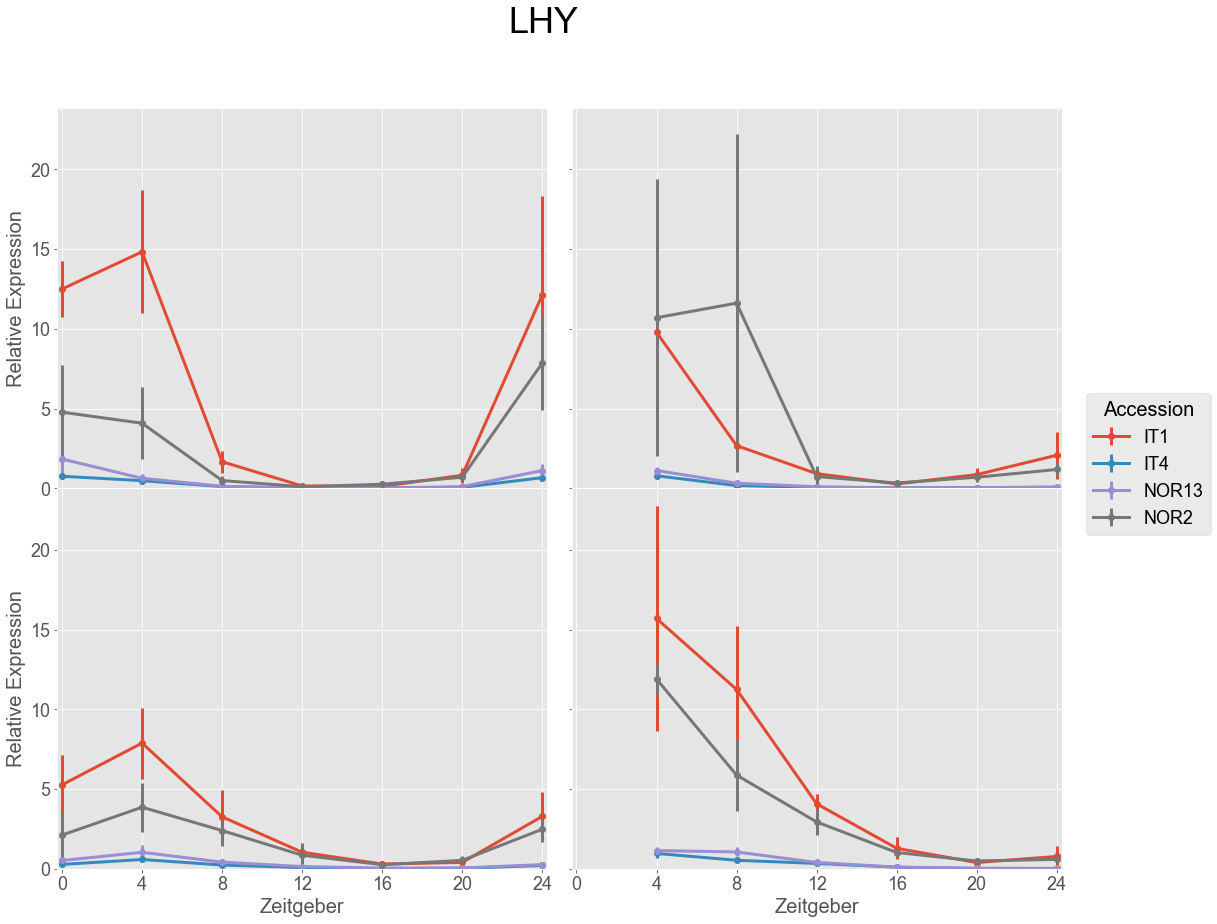

In [159]:
plot_gene_24h(data2, 'LHY')

In [160]:
peak_values_24h(data2, 'LHY')

2delta_Cq           
                            idxmax        max
Treatment      Accession                     
Arctic         IT1               4   7.887301
               IT4               4   0.584477
               NOR13             4   1.035178
               NOR2              4   3.863677
D-Arctic       IT1               4  15.704350
               IT4               4   0.964340
               NOR13             4   1.141765
               NOR2              4  11.904944
D-Mid-latitude IT1               4   9.792016
               IT4               4   0.785141
               NOR13             4   1.114795
               NOR2              8  11.615560
Mid-latitude   IT1               4  14.834238
               IT4               0   0.754656
               NOR13             0   1.834465
               NOR2             24   7.860449

In [161]:
tukey_btw_treatment_24h(data2, 'LHY')

Significant results between treatments for LHY


,Treatment_1,Treatment_2,Accession,ZT,meandiff,lower,upper,p-adj
0,Arctic,Mid-latitude,IT1,0,7.2339,1.4618,13.0061,0.0021
0,Arctic,Mid-latitude,IT4,0,0.4801,0.2473,0.7130,0.0000
0,Arctic,Mid-latitude,NOR13,0,1.3135,0.5888,2.0382,0.0000
261,Arctic,Mid-latitude,IT1,24,8.8444,1.8188,15.8700,0.0019
261,Arctic,Mid-latitude,IT4,24,0.4572,0.1432,0.7711,0.0001
261,Arctic,Mid-latitude,NOR13,24,0.8481,0.0113,1.6849,0.0431
299,Arctic,Mid-latitude,IT1,4,6.9469,1.5049,12.3890,0.0015
297,Arctic,D-Arctic,IT1,4,7.8170,1.5331,14.1010,0.0024
297,Arctic,D-Arctic,IT4,4,0.3799,0.0991,0.6607,0.0005
297,Arctic,D-Arctic,NOR2,4,8.0413,1.3543,14.7282,0.0041


In [162]:
tukey_btw_accs_24h(data2, 'LHY')

Significant results between accessions for LHY


,Treatment,Accession_1,Accession_2,ZT,meandiff,lower,upper,p-adj
0,Arctic,IT1,IT4,0,-4.9925,-6.9684,-3.0167,0.0000
1,Arctic,IT1,NOR13,0,-4.7461,-6.9350,-2.5572,0.0000
2,Arctic,IT1,NOR2,0,-3.1513,-5.2150,-1.0876,0.0000
312,Arctic,IT1,IT4,24,-3.0854,-5.7497,-0.4212,0.0066
313,Arctic,IT1,NOR13,24,-3.0305,-5.6948,-0.3663,0.0088
350,Arctic,IT1,IT4,4,-7.3028,-9.3665,-5.2391,0.0000
351,Arctic,IT1,NOR13,4,-6.8521,-8.8280,-4.8763,0.0000
352,Arctic,IT1,NOR2,4,-4.0236,-5.9995,-2.0478,0.0000
358,Arctic,IT4,NOR2,4,3.2792,1.3033,5.2551,0.0000
363,Arctic,NOR13,NOR2,4,2.8285,0.9446,4.7124,0.0000


In [163]:
# data2.loc[data2['Sample'] == 'N2_9D'].sort_values(by='Target')

In [165]:
# LHY = data2[data2['Target'] == 'LHY']

# fig = interaction_plot(x = LHY['ZT_24'], trace = LHY['Accession'], response = LHY['2delta_Cq'])
# pp.show()

## RVE8

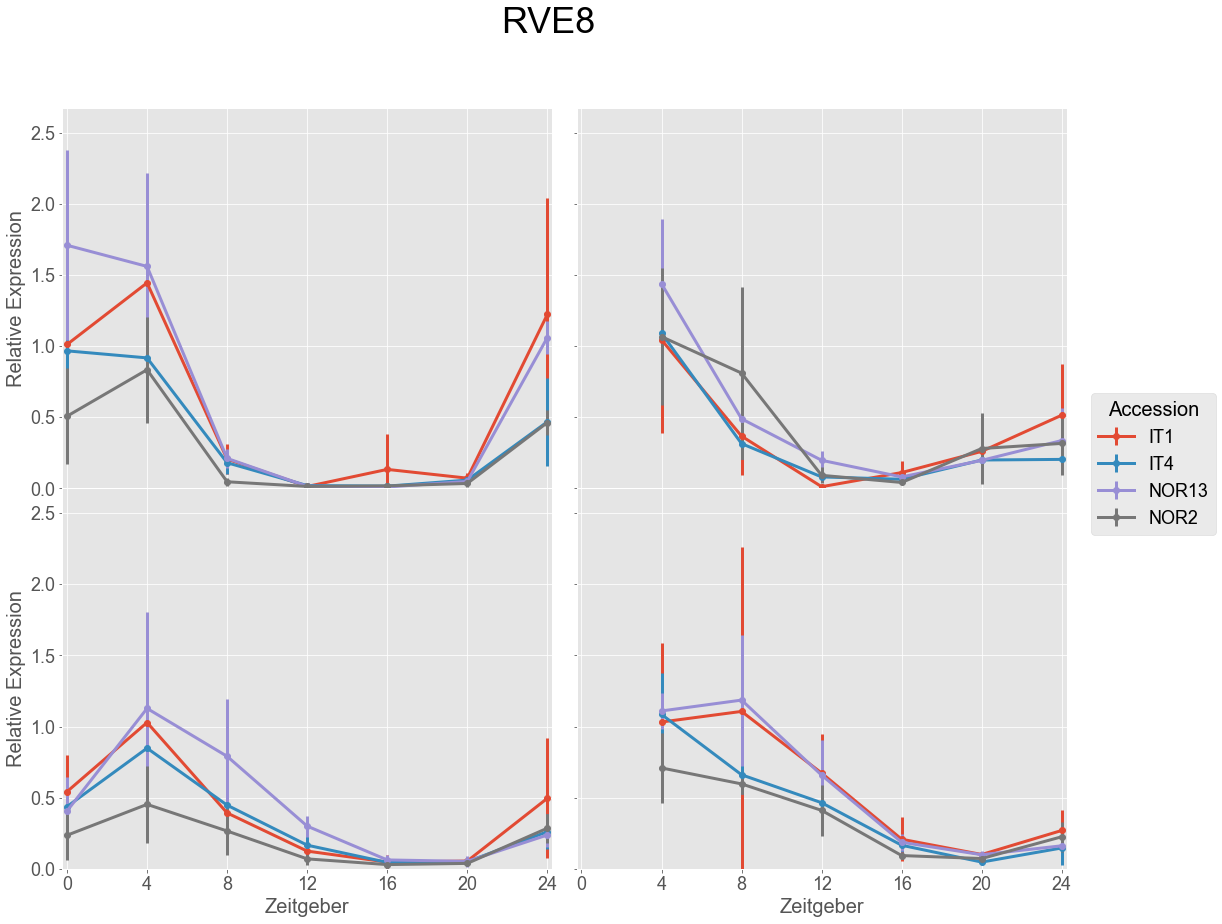

In [166]:
plot_gene_24h(data2, 'RVE8')

In [167]:
peak_values_24h(data2, 'RVE8')

2delta_Cq          
                            idxmax       max
Treatment      Accession                    
Arctic         IT1               4  1.028121
               IT4               4  0.847847
               NOR13             4  1.127111
               NOR2              4  0.452862
D-Arctic       IT1               8  1.106045
               IT4               4  1.084749
               NOR13             8  1.185614
               NOR2              4  0.708797
D-Mid-latitude IT1               4  1.043145
               IT4               4  1.089621
               NOR13             4  1.437331
               NOR2              4  1.065583
Mid-latitude   IT1               4  1.443740
               IT4               0  0.965775
               NOR13             0  1.707835
               NOR2              4  0.833125

In [168]:
tukey_btw_treatment_24h(data2, 'RVE8')

Significant results between treatments for RVE8


,Treatment_1,Treatment_2,Accession,ZT,meandiff,lower,upper,p-adj
0,Arctic,Mid-latitude,IT4,0,0.5285,0.2154,0.8417,0.0000
0,Arctic,Mid-latitude,NOR13,0,1.3016,0.4685,2.1348,0.0000
324,D-Mid-latitude,Mid-latitude,NOR2,8,-0.7637,-1.3298,-0.1976,0.0005


In [169]:
tukey_btw_accs_24h(data2, 'RVE8')

Significant results between accessions for RVE8


,Treatment,Accession_1,Accession_2,ZT,meandiff,lower,upper,p-adj
352,Arctic,IT1,NOR2,4,-0.5753,-1.1239,-0.0266,0.0280
363,Arctic,NOR13,NOR2,4,-0.6742,-1.1973,-0.1512,0.0010
377,Arctic,NOR13,NOR2,8,-0.5248,-1.0479,-0.0018,0.0481
27,Mid-latitude,IT4,NOR13,0,0.7421,0.0038,1.4803,0.0471
53,Mid-latitude,NOR13,NOR2,0,-1.2014,-1.9118,-0.4910,0.0000
363,Mid-latitude,NOR13,NOR2,4,-0.7260,-1.4364,-0.0156,0.0386


## PRR9

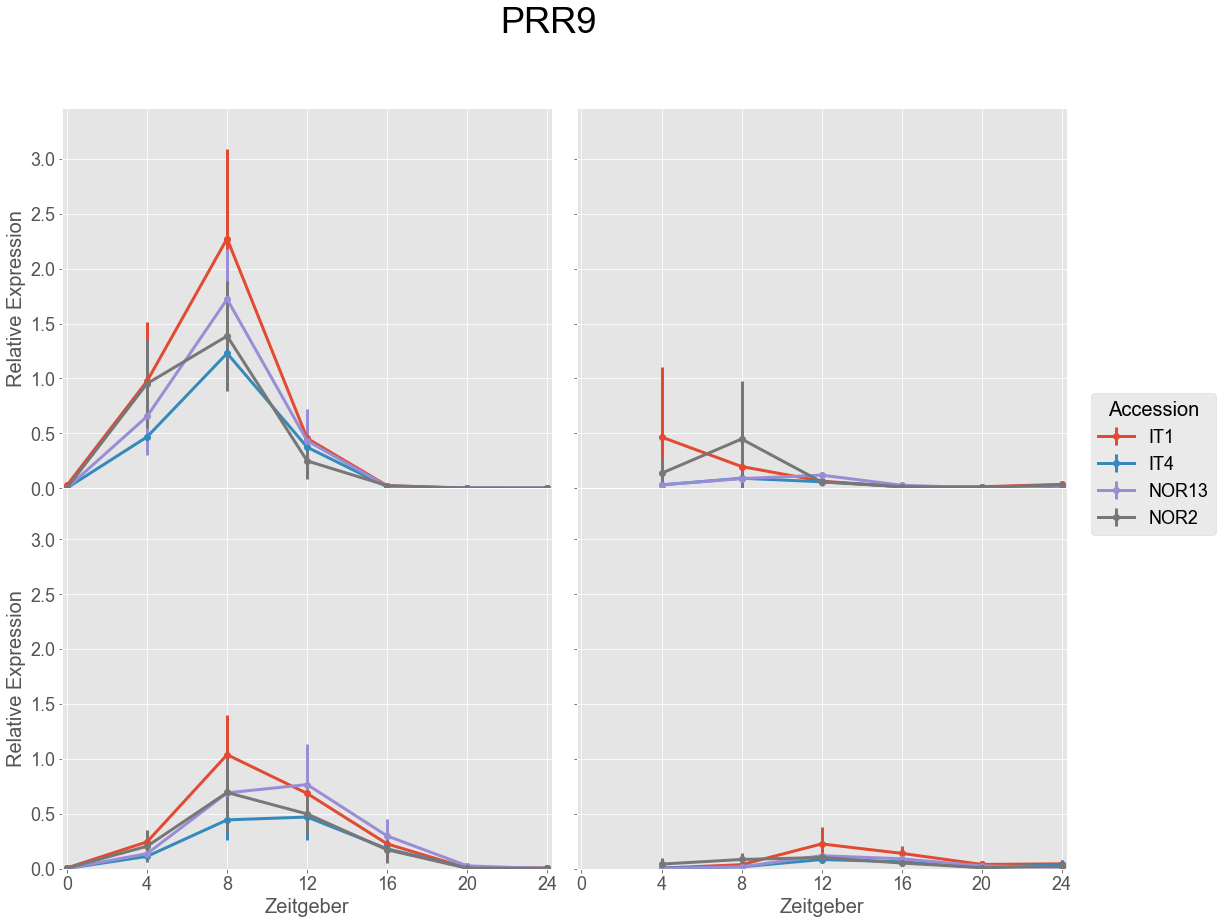

In [170]:
plot_gene_24h(data2, 'PRR9')

In [171]:
peak_values_24h(data2, 'PRR9')

2delta_Cq          
                            idxmax       max
Treatment      Accession                    
Arctic         IT1               8  1.039185
               IT4              12  0.471559
               NOR13            12  0.767259
               NOR2              8  0.695007
D-Arctic       IT1              12  0.226615
               IT4              12  0.084207
               NOR13            12  0.119400
               NOR2             12  0.102989
D-Mid-latitude IT1               4  0.466632
               IT4               8  0.091368
               NOR13            12  0.119712
               NOR2              8  0.448545
Mid-latitude   IT1               8  2.273755
               IT4               8  1.229625
               NOR13             8  1.722357
               NOR2              8  1.386874

In [172]:
tukey_btw_treatment_24h(data2, 'PRR9')

Significant results between treatments for PRR9


,Treatment_1,Treatment_2,Accession,ZT,meandiff,lower,upper,p-adj
299,Arctic,Mid-latitude,IT1,4,0.7305,0.0141,1.4469,0.0402
299,Arctic,Mid-latitude,IT4,4,0.3548,0.0738,0.6359,0.0019
299,Arctic,Mid-latitude,NOR2,4,0.7477,0.2797,1.2158,0.0000
299,Arctic,Mid-latitude,NOR13,4,0.5164,0.0743,0.9584,0.0066
321,Arctic,Mid-latitude,IT1,8,1.2346,0.5806,1.8885,0.0000
321,Arctic,Mid-latitude,IT4,8,0.7840,0.5029,1.0651,0.0000
321,Arctic,Mid-latitude,NOR2,8,0.6919,0.2238,1.1599,0.0001
321,Arctic,Mid-latitude,NOR13,8,1.0307,0.5887,1.4728,0.0000
49,Arctic,D-Arctic,IT4,12,-0.3874,-0.7592,-0.0155,0.0313
49,Arctic,D-Arctic,NOR13,12,-0.6479,-1.1321,-0.1636,0.0006


In [173]:
tukey_btw_accs_24h(data2, 'PRR9')

Significant results between accessions for PRR9


,Treatment,Accession_1,Accession_2,ZT,meandiff,lower,upper,p-adj
372,Arctic,IT1,IT4,8,-0.5936,-0.9958,-0.1914,0.0000
372,Mid-latitude,IT1,IT4,8,-1.0441,-1.6999,-0.3884,0.0000
374,Mid-latitude,IT1,NOR2,8,-0.8869,-1.5121,-0.2616,0.0001


## PRR7

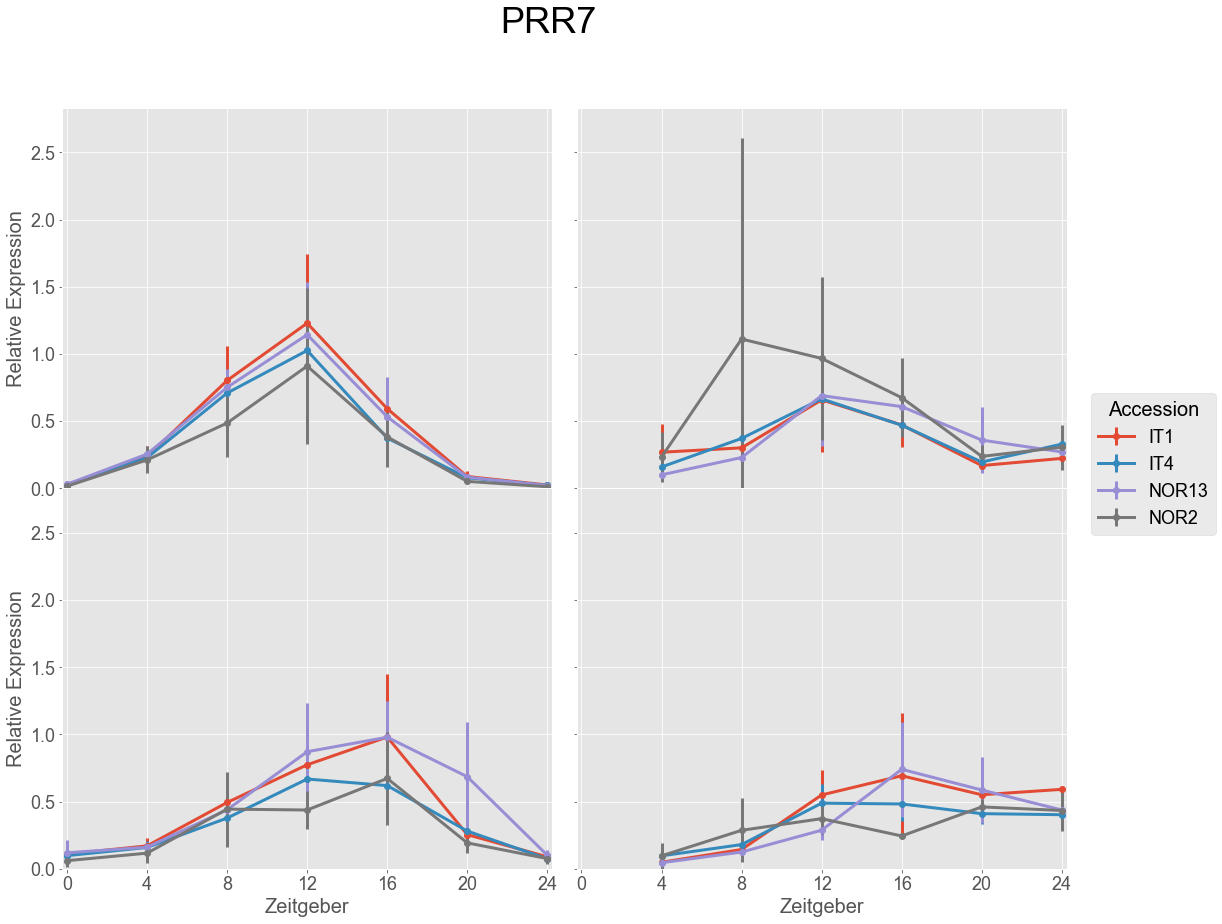

In [174]:
plot_gene_24h(data2, 'PRR7')

In [175]:
peak_values_24h(data2, 'PRR7')

2delta_Cq          
                            idxmax       max
Treatment      Accession                    
Arctic         IT1              16  0.980972
               IT4              12  0.668322
               NOR13            16  0.979285
               NOR2             16  0.672671
D-Arctic       IT1              16  0.692642
               IT4              12  0.488361
               NOR13            16  0.740513
               NOR2             20  0.460703
D-Mid-latitude IT1              12  0.658084
               IT4              12  0.665709
               NOR13            12  0.689631
               NOR2              8  1.110925
Mid-latitude   IT1              12  1.229015
               IT4              12  1.025616
               NOR13            12  1.143180
               NOR2             12  0.909558

In [176]:
tukey_btw_treatment_24h(data2, 'PRR7')

Significant results between treatments for PRR7


,Treatment_1,Treatment_2,Accession,ZT,meandiff,lower,upper,p-adj
51,Arctic,Mid-latitude,IT4,12,0.3573,0.0138,0.7008,0.0319
207,Arctic,Mid-latitude,NOR13,20,-0.6029,-1.1353,-0.0705,0.0104


In [177]:
tukey_btw_accs_24h(data2, 'PRR7')

Significant results between accessions for PRR7


,Treatment,Accession_1,Accession_2,ZT,meandiff,lower,upper,p-adj
287,Arctic,NOR13,NOR2,20,-0.4925,-0.9517,-0.0333,0.0207


## PRR5

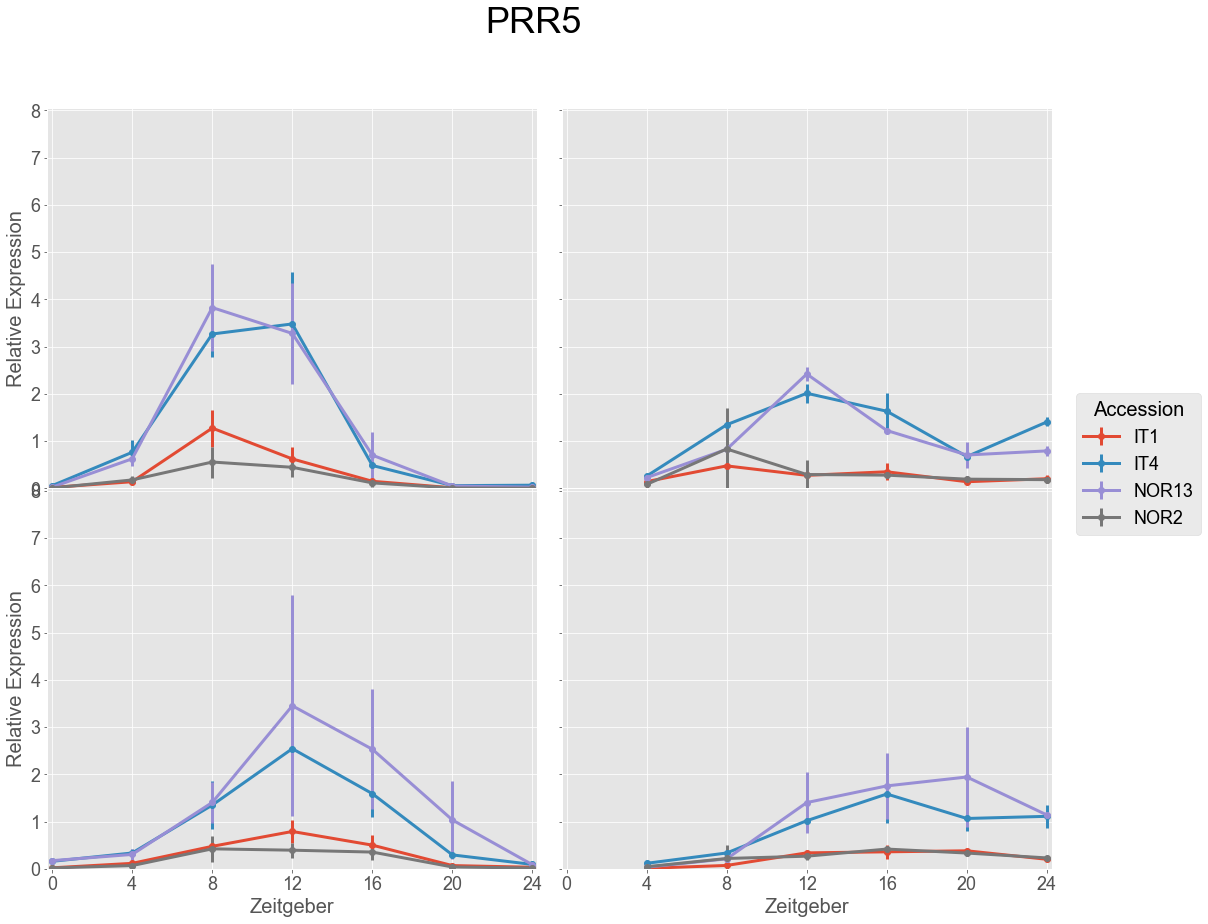

In [178]:
plot_gene_24h(data2, 'PRR5')

In [179]:
peak_values_24h(data2, 'PRR5')

2delta_Cq          
                            idxmax       max
Treatment      Accession                    
Arctic         IT1              12  0.790308
               IT4              12  2.543616
               NOR13            12  3.452456
               NOR2              8  0.422703
D-Arctic       IT1              20  0.381222
               IT4              16  1.583956
               NOR13            20  1.944121
               NOR2             16  0.417875
D-Mid-latitude IT1               8  0.474298
               IT4              12  2.011784
               NOR13            12  2.419693
               NOR2              8  0.832525
Mid-latitude   IT1               8  1.274606
               IT4              12  3.480096
               NOR13             8  3.826773
               NOR2              8  0.555927

In [180]:
tukey_btw_treatment_24h(data2, 'PRR5')

Significant results between treatments for PRR5


,Treatment_1,Treatment_2,Accession,ZT,meandiff,lower,upper,p-adj
137,Arctic,Mid-latitude,IT4,16,-1.1078,-2.1005,-0.1151,0.0130
321,Arctic,Mid-latitude,IT1,8,0.7990,0.4328,1.1653,0.0000
321,Arctic,Mid-latitude,IT4,8,1.9179,0.8182,3.0177,0.0000
321,Arctic,Mid-latitude,NOR13,8,2.4221,0.3830,4.4611,0.0051
49,Arctic,D-Arctic,IT4,12,-1.5250,-2.8966,-0.1534,0.0137
94,D-Mid-latitude,Mid-latitude,IT4,12,1.4683,0.2711,2.6655,0.0032
324,D-Mid-latitude,Mid-latitude,IT1,8,0.8003,0.3518,1.2488,0.0000
324,D-Mid-latitude,Mid-latitude,IT4,8,1.9212,0.5496,3.2928,0.0003
324,D-Mid-latitude,Mid-latitude,NOR13,8,3.0008,0.5882,5.4134,0.0024


In [181]:
tukey_btw_accs_24h(data2, 'PRR5')

Significant results between accessions for PRR5


,Treatment,Accession_1,Accession_2,ZT,meandiff,lower,upper,p-adj
102,Arctic,IT1,IT4,12,1.7533,0.2812,3.2255,0.0042
103,Arctic,IT1,NOR13,12,2.6621,1.2585,4.0658,0.0000
126,Arctic,IT4,NOR2,12,-2.1495,-3.7804,-0.5186,0.0006
147,Arctic,NOR13,NOR2,12,-3.0584,-4.6277,-1.4891,0.0000
189,Arctic,IT1,NOR13,16,2.0301,0.5580,3.5023,0.0002
225,Arctic,NOR13,NOR2,16,-2.1767,-3.8076,-0.5459,0.0005
102,Mid-latitude,IT1,IT4,12,2.8582,1.8974,3.8191,-0.0000
103,Mid-latitude,IT1,NOR13,12,2.6569,1.7370,3.5769,-0.0000
126,Mid-latitude,IT4,NOR2,12,-3.0358,-3.9966,-2.0749,-0.0000
147,Mid-latitude,NOR13,NOR2,12,-2.8345,-3.7544,-1.9145,-0.0000


## TOC1

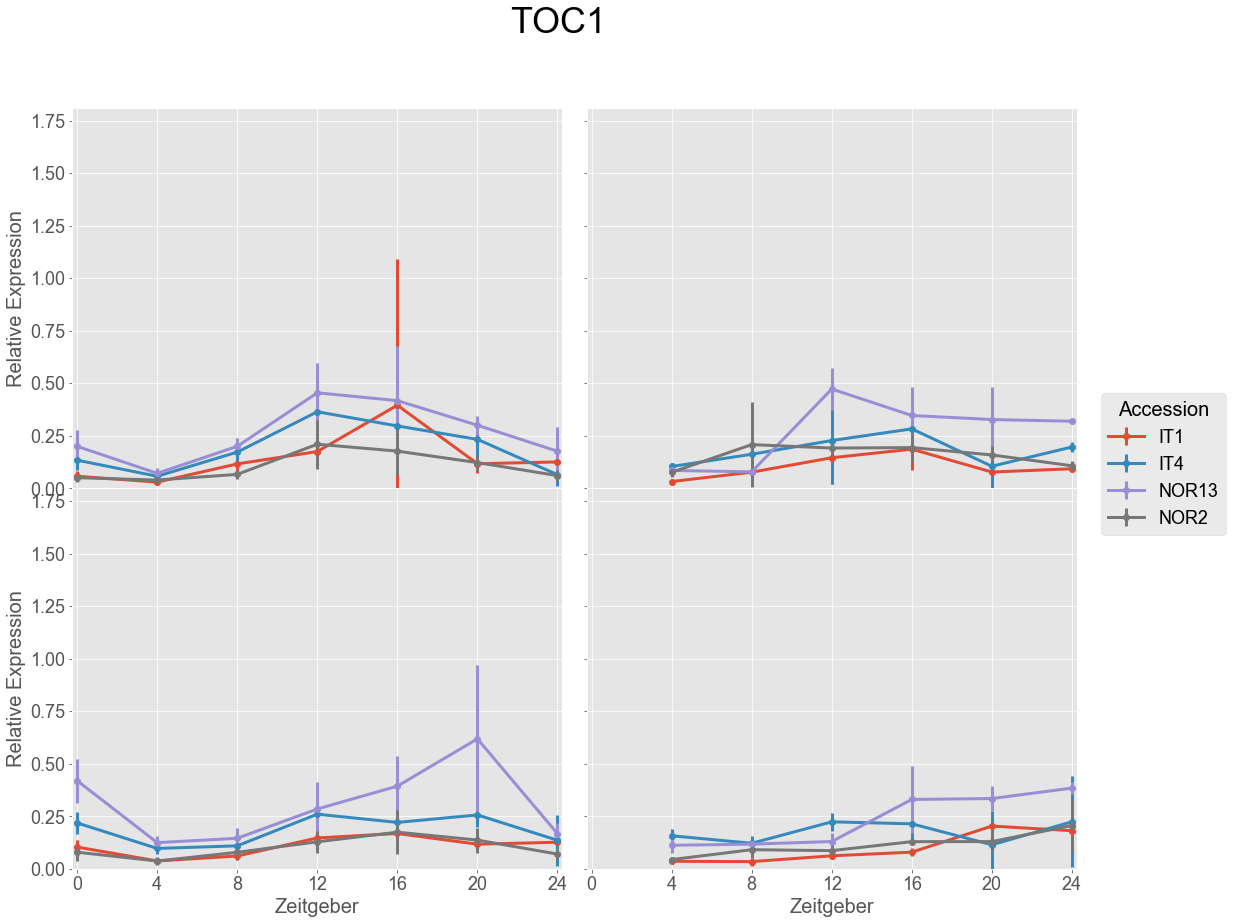

In [182]:
plot_gene_24h(data2, 'TOC1')

In [183]:
peak_values_24h(data2, 'TOC1')

2delta_Cq          
                            idxmax       max
Treatment      Accession                    
Arctic         IT1              16  0.168040
               IT4              12  0.259949
               NOR13            20  0.618432
               NOR2             16  0.174320
D-Arctic       IT1              20  0.203311
               IT4              24  0.223819
               NOR13            24  0.384043
               NOR2             24  0.205951
D-Mid-latitude IT1              16  0.186230
               IT4              16  0.282685
               NOR13            12  0.472323
               NOR2              8  0.207852
Mid-latitude   IT1              16  0.395369
               IT4              12  0.364211
               NOR13            12  0.454356
               NOR2             12  0.209677

In [184]:
tukey_btw_treatment_24h(data2, 'TOC1')

Significant results between treatments for TOC1


,Treatment_1,Treatment_2,Accession,ZT,meandiff,lower,upper,p-adj


In [185]:
tukey_btw_accs_24h(data2, 'TOC1')

Significant results between accessions for TOC1


,Treatment,Accession_1,Accession_2,ZT,meandiff,lower,upper,p-adj
1,Arctic,IT1,NOR13,0,0.3162,0.0602,0.5722,0.0022
53,Arctic,NOR13,NOR2,0,-0.3406,-0.5966,-0.0846,0.0005
259,Arctic,IT1,NOR13,20,0.5013,0.2702,0.7324,0.0000
273,Arctic,IT4,NOR13,20,0.3621,0.1418,0.5825,0.0000
287,Arctic,NOR13,NOR2,20,-0.4818,-0.7021,-0.2614,0.0000


## LUX

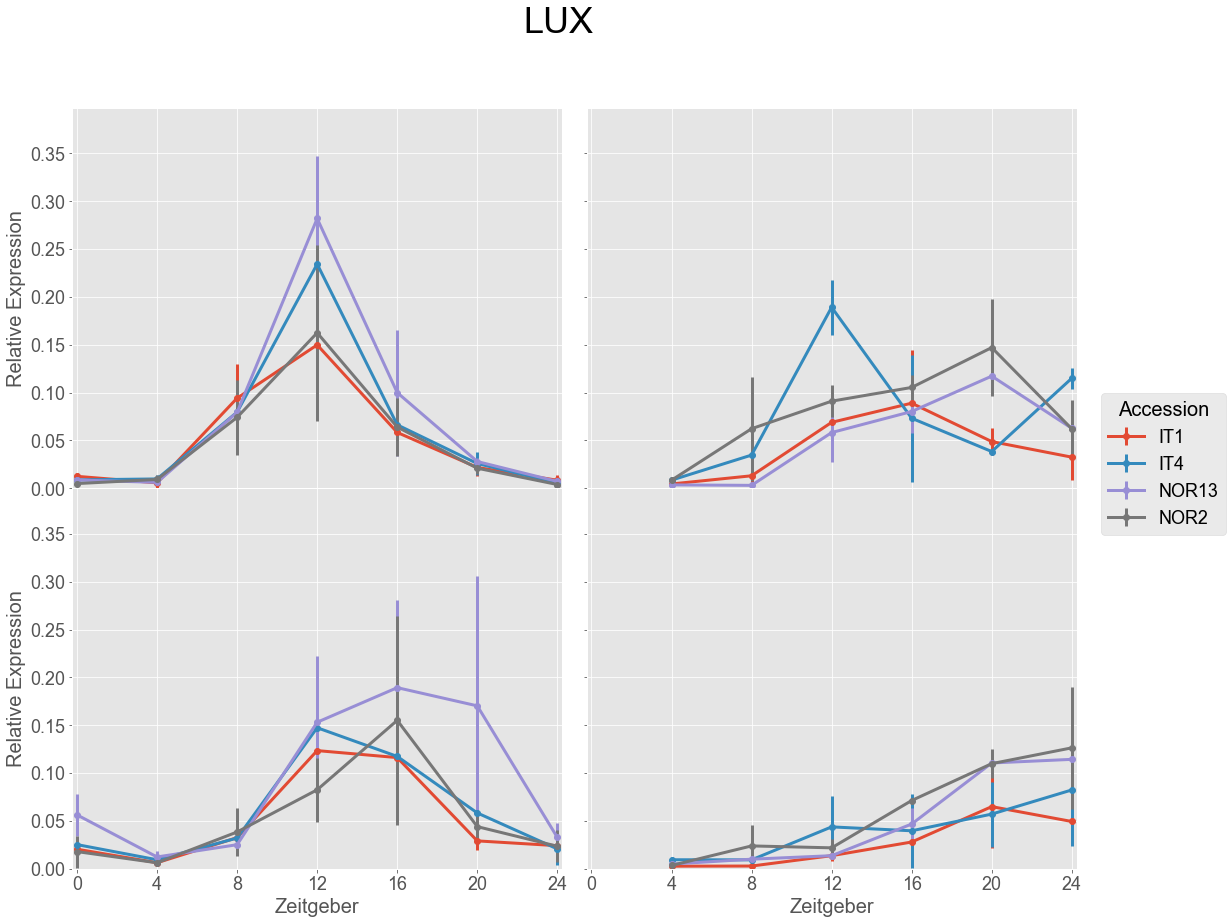

In [186]:
plot_gene_24h(data2, 'LUX')

In [187]:
peak_values_24h(data2, 'LUX')

2delta_Cq          
                            idxmax       max
Treatment      Accession                    
Arctic         IT1              12  0.123548
               IT4              12  0.147451
               NOR13            16  0.189354
               NOR2             16  0.155173
D-Arctic       IT1              20  0.064991
               IT4              24  0.082424
               NOR13            24  0.114406
               NOR2             24  0.126439
D-Mid-latitude IT1              16  0.088971
               IT4              12  0.189217
               NOR13            20  0.117238
               NOR2             20  0.147080
Mid-latitude   IT1              12  0.149883
               IT4              12  0.234360
               NOR13            12  0.282006
               NOR2             12  0.162510

In [188]:
tukey_btw_treatment_24h(data2, 'LUX')

Significant results between treatments for LUX


,Treatment_1,Treatment_2,Accession,ZT,meandiff,lower,upper,p-adj
51,Arctic,Mid-latitude,IT4,12,0.0869,0.0231,0.1507,0.0005
51,Arctic,Mid-latitude,NOR13,12,0.1288,0.0156,0.2421,0.0098
207,Arctic,Mid-latitude,NOR13,20,-0.1424,-0.2611,-0.0236,0.0044
49,Arctic,D-Arctic,IT1,12,-0.1098,-0.1879,-0.0317,0.0002
49,Arctic,D-Arctic,IT4,12,-0.1036,-0.1881,-0.0192,0.0030
49,Arctic,D-Arctic,NOR13,12,-0.1395,-0.2782,-0.0008,0.0469
135,Arctic,D-Arctic,IT1,16,-0.0882,-0.1663,-0.0101,0.0108
72,D-Arctic,D-Mid-latitude,IT4,12,0.1454,0.0533,0.2375,0.0000
94,D-Mid-latitude,Mid-latitude,IT1,12,0.0810,0.0003,0.1616,0.0480
94,D-Mid-latitude,Mid-latitude,NOR13,12,0.2238,0.0851,0.3625,0.0000


In [189]:
tukey_btw_accs_24h(data2, 'LUX')

Significant results between accessions for LUX


,Treatment,Accession_1,Accession_2,ZT,meandiff,lower,upper,p-adj
259,Arctic,IT1,NOR13,20,0.1411,0.0298,0.2525,0.0013
273,Arctic,IT4,NOR13,20,0.1119,0.0058,0.2181,0.0259
287,Arctic,NOR13,NOR2,20,-0.1262,-0.2324,-0.0201,0.0043
102,Mid-latitude,IT1,IT4,12,0.0845,0.0047,0.1643,0.0249
103,Mid-latitude,IT1,NOR13,12,0.1321,0.0557,0.2086,0.0000
147,Mid-latitude,NOR13,NOR2,12,-0.1195,-0.1959,-0.0431,0.0000


## PRDX

In [190]:
# plot_gene(data2, 'PRDX')

In [191]:
# plot_gene_24h(data2, 'PRDX')

In [192]:
# peak_values_24h(data2, 'PRDX')

In [193]:
# zt_24_anova(data2, 'PRDX')

In [194]:
# tukey_treatment_groups_24h(data2, 'PRDX')

In [195]:
STOP

NameError: name 'STOP' is not defined

## PCA

In [ ]:
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [ ]:
data2.head()

In [ ]:
gene_data = df.loc[df['Target']==target_gene] 
It = gene_data[gene_data['Treatment'].str.contains('Mid-latitude')]
It = gene_data[gene_data['Treatment'].str.contains('Mid-latitude')] 
    It_groups = It.groupby('Treatment')

In [ ]:
 ref_gene = df[(df['Target']==ref1) | (df['Target']==ref2)]

    ref_gene.reset_index(inplace=True)
    ref_gene.set_index(['Sample', 'Replicate', 'Target'], inplace = True)
    ref_gene = ref_gene.unstack(level=2)

    # Get geometric mean of reference genes
    ref_gene[(       'Cq', 'gmean')] = gmean([ref_gene[(       'Cq', ref1)], 
                                                            ref_gene[(       'Cq',  ref2)]])
    ref_gene = ref_gene.stack(level=1)
    ref_gene.reset_index(inplace=True)
    ref_gene.set_index(['Sample', 'Replicate'], inplace = True)
    

In [ ]:
LHY = data2.loc[data2['Target'] == 'LHY']
LHY

In [ ]:
LHY = pd.melt(LHY, id_vars = ['Accession', 'Treatment', 'Sample'],
             value_vars = '2_delta_Cq',
              var_name = 'drop',
             value_name = '2delta_Cq')
LHY.drop(columns = 'drop', inplace = True)

In [ ]:
LHY

In [ ]:
LHY_groups = LHY.groupby(['Accession', 'Treatment'])['2delta_Cq']
for g in LHY_groups:
    print(g)

In [ ]:
LHY.pivot(index = 'Sample', columns = ['Accession', 'Treatment'], values = '2delta_Cq')

In [ ]:
LHY.set_index(['Sample'], inplace = True)
LHY

In [ ]:

components = pca().fit_transform(data2['2delta_Cq'])